In [1]:
import scanpy as sc
sc.settings.verbosity = 3
sc.logging.print_header()
sc.settings.set_figure_params(dpi=150,facecolor='white')

from genevector.data import GeneVectorDataset
from genevector.model import GeneVector
from genevector.embedding import GeneEmbedding, CellEmbedding

scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.22.4 scipy==1.9.0 pandas==1.5.1 scikit-learn==1.0.2 statsmodels==0.13.2 python-igraph==0.10.4 pynndescent==0.5.7


In [2]:
from scipy import sparse
adata = sc.read("PBMC.h5ad")


In [3]:
from scipy import sparse
adata = sc.read("PBMC.h5ad")
dataset = GeneVectorDataset(adata)
embed = GeneEmbedding("embeddings/pbmc_nextgen.vec", dataset, vector="average")

Loading Expression.


100%|██████████| 1051348/1051348 [00:01<00:00, 988364.26it/s]


Reindexing Cooc


100%|██████████| 14039/14039 [00:00<00:00, 61269.61it/s]


Loading average of 1st and 2nd weights.


100%|██████████| 1000/1000 [00:00<00:00, 3650395.13it/s]


In [4]:
embed = GeneEmbedding("embeddings/pbmc_nextgen.vec", dataset, vector="average")

Loading average of 1st and 2nd weights.


100%|██████████| 1000/1000 [00:00<00:00, 3246365.33it/s]


In [5]:
embed.compute_similarities("IFIT1")[:15]['Gene'].tolist()

['IFIT1',
 'IFIT3',
 'LY6E',
 'ISG15',
 'OAS1',
 'TNFSF10',
 'MX1',
 'ISG20',
 'LAP3',
 'SAMD9L',
 'IFIT2',
 'RSAD2',
 'IRF7',
 'OASL',
 'GBP1']

In [6]:
import scanpy as sc
sc.settings.verbosity = 3
sc.logging.print_header()
sc.settings.set_figure_params(dpi=150,facecolor='white')

from genevector.data import GeneVectorDataset
from genevector.model import GeneVector
from genevector.embedding import GeneEmbedding, CellEmbedding

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import pandas
import umap
import tqdm
import scanpy as sc
import networkx as nx
from sklearn.metrics import confusion_matrix
from scipy.special import softmax
from scipy.spatial import distance
import numpy
from scipy.sparse import csr_matrix, find
import numpy as np
import operator
import collections
import os   
import pandas as pd
import gc


import gc
def batch_correct(self, column, reference):
    if not column:
        raise ValueError("Must supply batch label to correct.")
    column_labels = dict(zip(self.context.cells, self.context.metadata[column]))
    labels = []
    for key in self.data.keys():
        labels.append(column_labels[key])
    batches = collections.defaultdict(list)
    correction_vectors = dict()
    rcorrection_vectors = dict()
    for batch, vec in zip(labels, self.matrix):
        batches[batch].append(vec)
    assert reference in batches, "Reference label not found."
    reference_vector = numpy.average(batches.pop(reference),axis=0)
    print("Generating batch vectors.")
    for batch, vbatches in batches.items():
        if batch != reference:
            batch_vec = numpy.average(vbatches, axis=0)
            offset = numpy.subtract(reference_vector,batch_vec)
            correction_vectors[batch] = offset
            rcorrection_vectors[batch] = numpy.subtract(batch_vec, reference_vector)
            print("Computing correction vector for {}.".format(batch))
    corrected_matrix = []
    gc.collect()
    self.cell_order = []
    print("Applying correction vectors.")
    for batch, xvec in zip(labels, self.matrix):
        if  batch != reference:
            offset = correction_vectors[batch]
            xvec = numpy.add(numpy.array(xvec),offset)
        corrected_matrix.append(xvec)
    self.uncorrected_matrix = self.matrix
    self.matrix = corrected_matrix
    return rcorrection_vectors

scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.22.4 scipy==1.9.0 pandas==1.5.1 scikit-learn==1.0.2 statsmodels==0.13.2 python-igraph==0.10.4 pynndescent==0.5.7


In [7]:
def get_similar_genes(self, vector):
    distances = dict()
    targets = list(self.embeddings.keys())
    for target in targets:
        if target not in self.embeddings:
            continue
        v = self.embeddings[target]
        distance = float(cosine_similarity(numpy.array(vector).reshape(1, -1),numpy.array(v).reshape(1, -1))[0])
        distances[target] = distance
    sorted_distances = list(reversed(sorted(distances.items(), key=operator.itemgetter(1))))
    genes = [x[0] for x in sorted_distances]
    distance = [x[1] for x in sorted_distances]
    df = pandas.DataFrame.from_dict({"Gene":genes, "Similarity":distance})
    return df

In [8]:
from scipy import sparse
adata = sc.read("PBMC.h5ad")
cembed = CellEmbedding(dataset, embed)
vecs = batch_correct(cembed, column="sample",reference="control")
adata = cembed.get_adata()


Loading Expression.


100%|██████████| 1051348/1051348 [00:01<00:00, 958467.69it/s]


Reindexing Cooc


100%|██████████| 14039/14039 [00:00<00:00, 61499.02it/s]


normalizing counts per cell
    finished (0:00:00)
Loading Expression.


100%|██████████| 14039/14039 [00:03<00:00, 3719.78it/s]


Generating batch vectors.
Computing correction vector for stimul.
Applying correction vectors.


In [10]:
import gseapy as gp
genes = embed.get_similar_genes(vecs["stimul"])[:20]

In [11]:
scores_ct = []
scores_bt = []

In [12]:
ref_bt = []
tcell_sim = []
mono_sim = []
isg_sim = []
tst = []
tsmono = []
tct = []
tcmono = []

In [15]:
import numpy
import random
from sklearn import metrics
from sklearn.metrics.pairwise import cosine_similarity
from IPython.display import clear_output

from sklearn.metrics import silhouette_samples, silhouette_score
adata = sc.read("PBMC.h5ad")

isg_vec = embed.generate_vector(embed.compute_similarities("IFIT1")[:15]['Gene'].tolist())
ctcells = collections.defaultdict(lambda : collections.defaultdict(list))


dataset = GeneVectorDataset(adata)
cembed = CellEmbedding(dataset, embed)
correction_vecs = batch_correct(cembed, column="sample",reference="control")
mapped_components = dict(zip(list(cembed.data.keys()),cembed.matrix))
cts = dict(zip(adata.obs.index,adata.obs["celltype"]))
tcell_vec = []
mono_vec = []

for v, vec in mapped_components.items():
    if cts[v] == "CD4 T cells":
        tcell_vec.append(vec)
    elif cts[v] == "CD14+ Monocytes":
        mono_vec.append(vec)
tcell = numpy.average(tcell_vec,axis=0)
mono = numpy.average(mono_vec,axis=0)


for fraction in range(100000):
    frac_stimul = random.uniform(0,1)
    frac_control = random.uniform(0,1)
    adata = sc.read("PBMC.h5ad")
    adata.X = sparse.csr_matrix(adata.X)
    
    adata = adata[adata.obs["celltype"].isin(["CD4 T cells","CD14+ Monocytes"])]
    keep = []
    for bc, bt, ct in zip(adata.obs.index,adata.obs["sample"],adata.obs["celltype"]):
        if bt == "stimul":
            if ct == "CD14+ Monocytes" and frac_control < random.uniform(0,1):
                keep.append(bc)
            elif ct == "CD4 T cells" and 1. - frac_control < random.uniform(0,1):
                keep.append(bc)
            else:
                continue
        if bt == "control":
            if ct == "CD14+ Monocytes" and frac_stimul < random.uniform(0,1):
                keep.append(bc)
            elif ct == "CD4 T cells" and 1. - frac_stimul < random.uniform(0,1):
                keep.append(bc)
            else:
                continue
    adata = adata[keep]
    cell = adata.obs
    
    cell_control = cell[cell["sample"]=="control"]
    cell_stimul = cell[cell["sample"]=="stimul"]
    
    control_mono = len(cell_control[cell_control["celltype"]=="CD14+ Monocytes"].index)
    control_t = len(cell_control[cell_control["celltype"]=="CD4 T cells"].index) 
    stim_mono = len(cell_stimul[cell_stimul["celltype"]=="CD14+ Monocytes"].index)
    stim_t = len(cell_stimul[cell_stimul["celltype"]=="CD4 T cells"].index) 
    
    print(control_mono, control_t, stim_t, stim_mono)
    dataset = GeneVectorDataset(adata)
    
    cembed = CellEmbedding(dataset, embed)
    correction_vecs = batch_correct(cembed, column="sample",reference="control")
    mapped_components = dict(zip(list(cembed.data.keys()),cembed.matrix))
    cts = dict(zip(adata.obs.index,adata.obs["celltype"]))
    tcell_vec = []
    mono_vec = []

    for v, vec in mapped_components.items():
        if cts[v] == "CD4 T cells":
            tcell_vec.append(vec)
        elif cts[v] == "CD14+ Monocytes":
            mono_vec.append(vec)
    tcell = numpy.average(tcell_vec,axis=0)
    mono = numpy.average(mono_vec,axis=0)
        
    
    for bt, vec in correction_vecs.items():
        monod = float(cosine_similarity(numpy.array(mono).reshape(1, -1),numpy.array(vec).reshape(1, -1))[0])
        isgd = float(cosine_similarity(numpy.array(isg_vec).reshape(1, -1),numpy.array(vec).reshape(1, -1))[0])
        tcelld = float(cosine_similarity(numpy.array(tcell).reshape(1, -1),numpy.array(vec).reshape(1, -1))[0])
        mono_sim.append(monod)
        tcell_sim.append(tcelld)
        isg_sim.append(isgd)
        ref_bt.append(bt)
        tcmono.append(control_mono)
        tct.append(control_t)
        tsmono.append(stim_t)
        tst.append(stim_mono)
    
    print(monod, tcelld, isgd)
    clear_output()

1145 1101 317 1842
Loading Expression.
Indexing expression.


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 406665/406665 [00:00<00:00, 1775355.80it/s]

Finished.
normalizing counts per cell
    finished (0:00:00)


KeyboardInterrupt: 

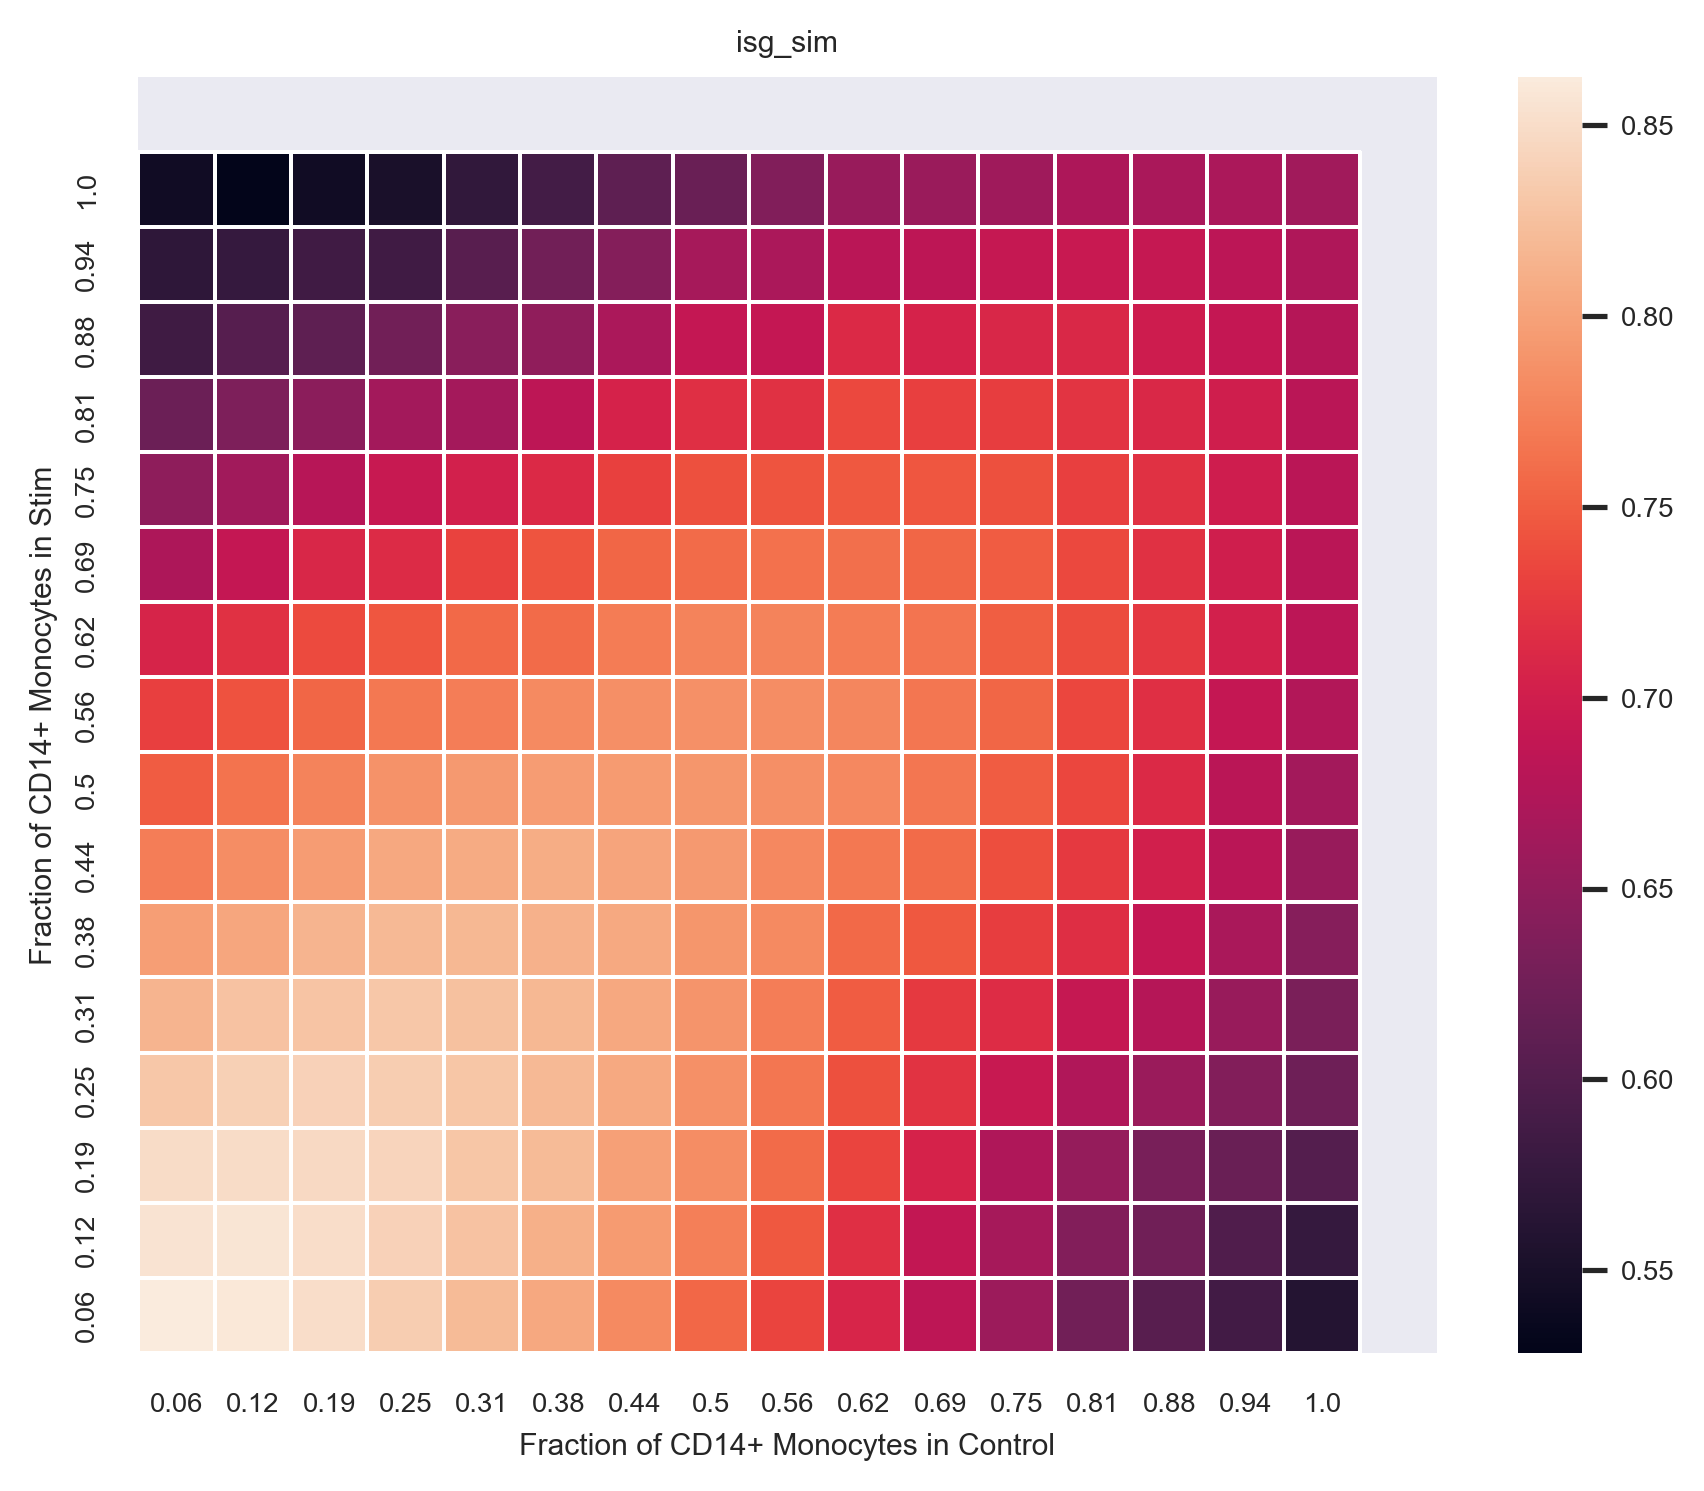

In [46]:
bins = 16
metric = "isg_sim"
sildf = pandas.DataFrame.from_dict({"num_mono_control":tcmono,
                                    "num_t_control":tct,
                                    "num_mono_stim":tsmono,
                                    "num_t_stim":tst,
                                    "tcell_sim":tcell_sim,
                                    "mono_sim":mono_sim,
                                    "isg_sim":isg_sim,
                                    "reference":ref_bt})
import numpy
fraction_control = []
fraction_stim = []
total_num_cells = []
l1 = []
for x,y,z,w in zip(sildf["num_mono_control"],
                   sildf["num_mono_stim"],
                   sildf["num_t_control"],
                   sildf["num_t_stim"]):
    stim_frac = y / (y + w)
    cont_frac = x / (z + x)
    
    cont_inv = 1 - cont_frac
    stim_inv = 1 - stim_frac
    prob1 = numpy.array([stim_frac, stim_inv])
    prob2 = numpy.array([cont_frac, cont_inv])
    dist = numpy.linalg.norm((prob1 - prob2), ord=1)
    l1.append(dist)
    fraction_control.append(cont_frac)
    fraction_stim.append(stim_frac)
    total_num_cells.append(x+y+z+w)
sildf["Stimulated Fraction"] = fraction_stim
sildf["Control Fraction"] = fraction_control
sildf["l1_norm"] = l1
sildf["Ratio"] = numpy.array(fraction_stim) / (numpy.array(fraction_control) + numpy.array(fraction_stim))
sildf["Cells"] = total_num_cells

lowj = 0.
matrix = []
for j in range(1,bins+1):
    highj = j / bins
    sub = sildf[sildf["Stimulated Fraction"] >= lowj]
    sub = sub[sub["Stimulated Fraction"] < highj]
    lowi = 0.
    row = []
    for i in range(1,bins+1):
        highi = i / bins
        subx = sub[sub["Control Fraction"] >= lowi]
        subx = subx[subx["Control Fraction"] < highi]
        row.append(subx["isg_sim"].median())
        lowi = highi
    matrix.append(row)
    lowj = highj
_restack = []
for m in reversed(matrix):
    _restack.append(m)
sns.set(font_scale=0.6)
matrix = numpy.array(_restack)
mdf = pandas.DataFrame(data=matrix,columns=list(range(1,bins+1)),index=list(range(1,bins+1)))
fig,ax=plt.subplots(1,1,figsize=(6,5))
sns.heatmap(mdf,ax=ax,linewidth=.5)
ax.set_xlim(0,bins+1)
ax.set_ylim(0,bins+1)
ax.set_xticklabels([str(round(x/bins,2)) for x in range(1,bins+1)])
ax.set_yticklabels([str(round(x/bins,2)) for x in range(1,bins+1)])
ax.set_xlabel("Fraction of CD14+ Monocytes in Control")
ax.set_ylabel("Fraction of CD14+ Monocytes in Stim")
ax.set_title(metric)
fig.tight_layout()
fig.savefig("/Users/ceglian/isg_sim.pdf")

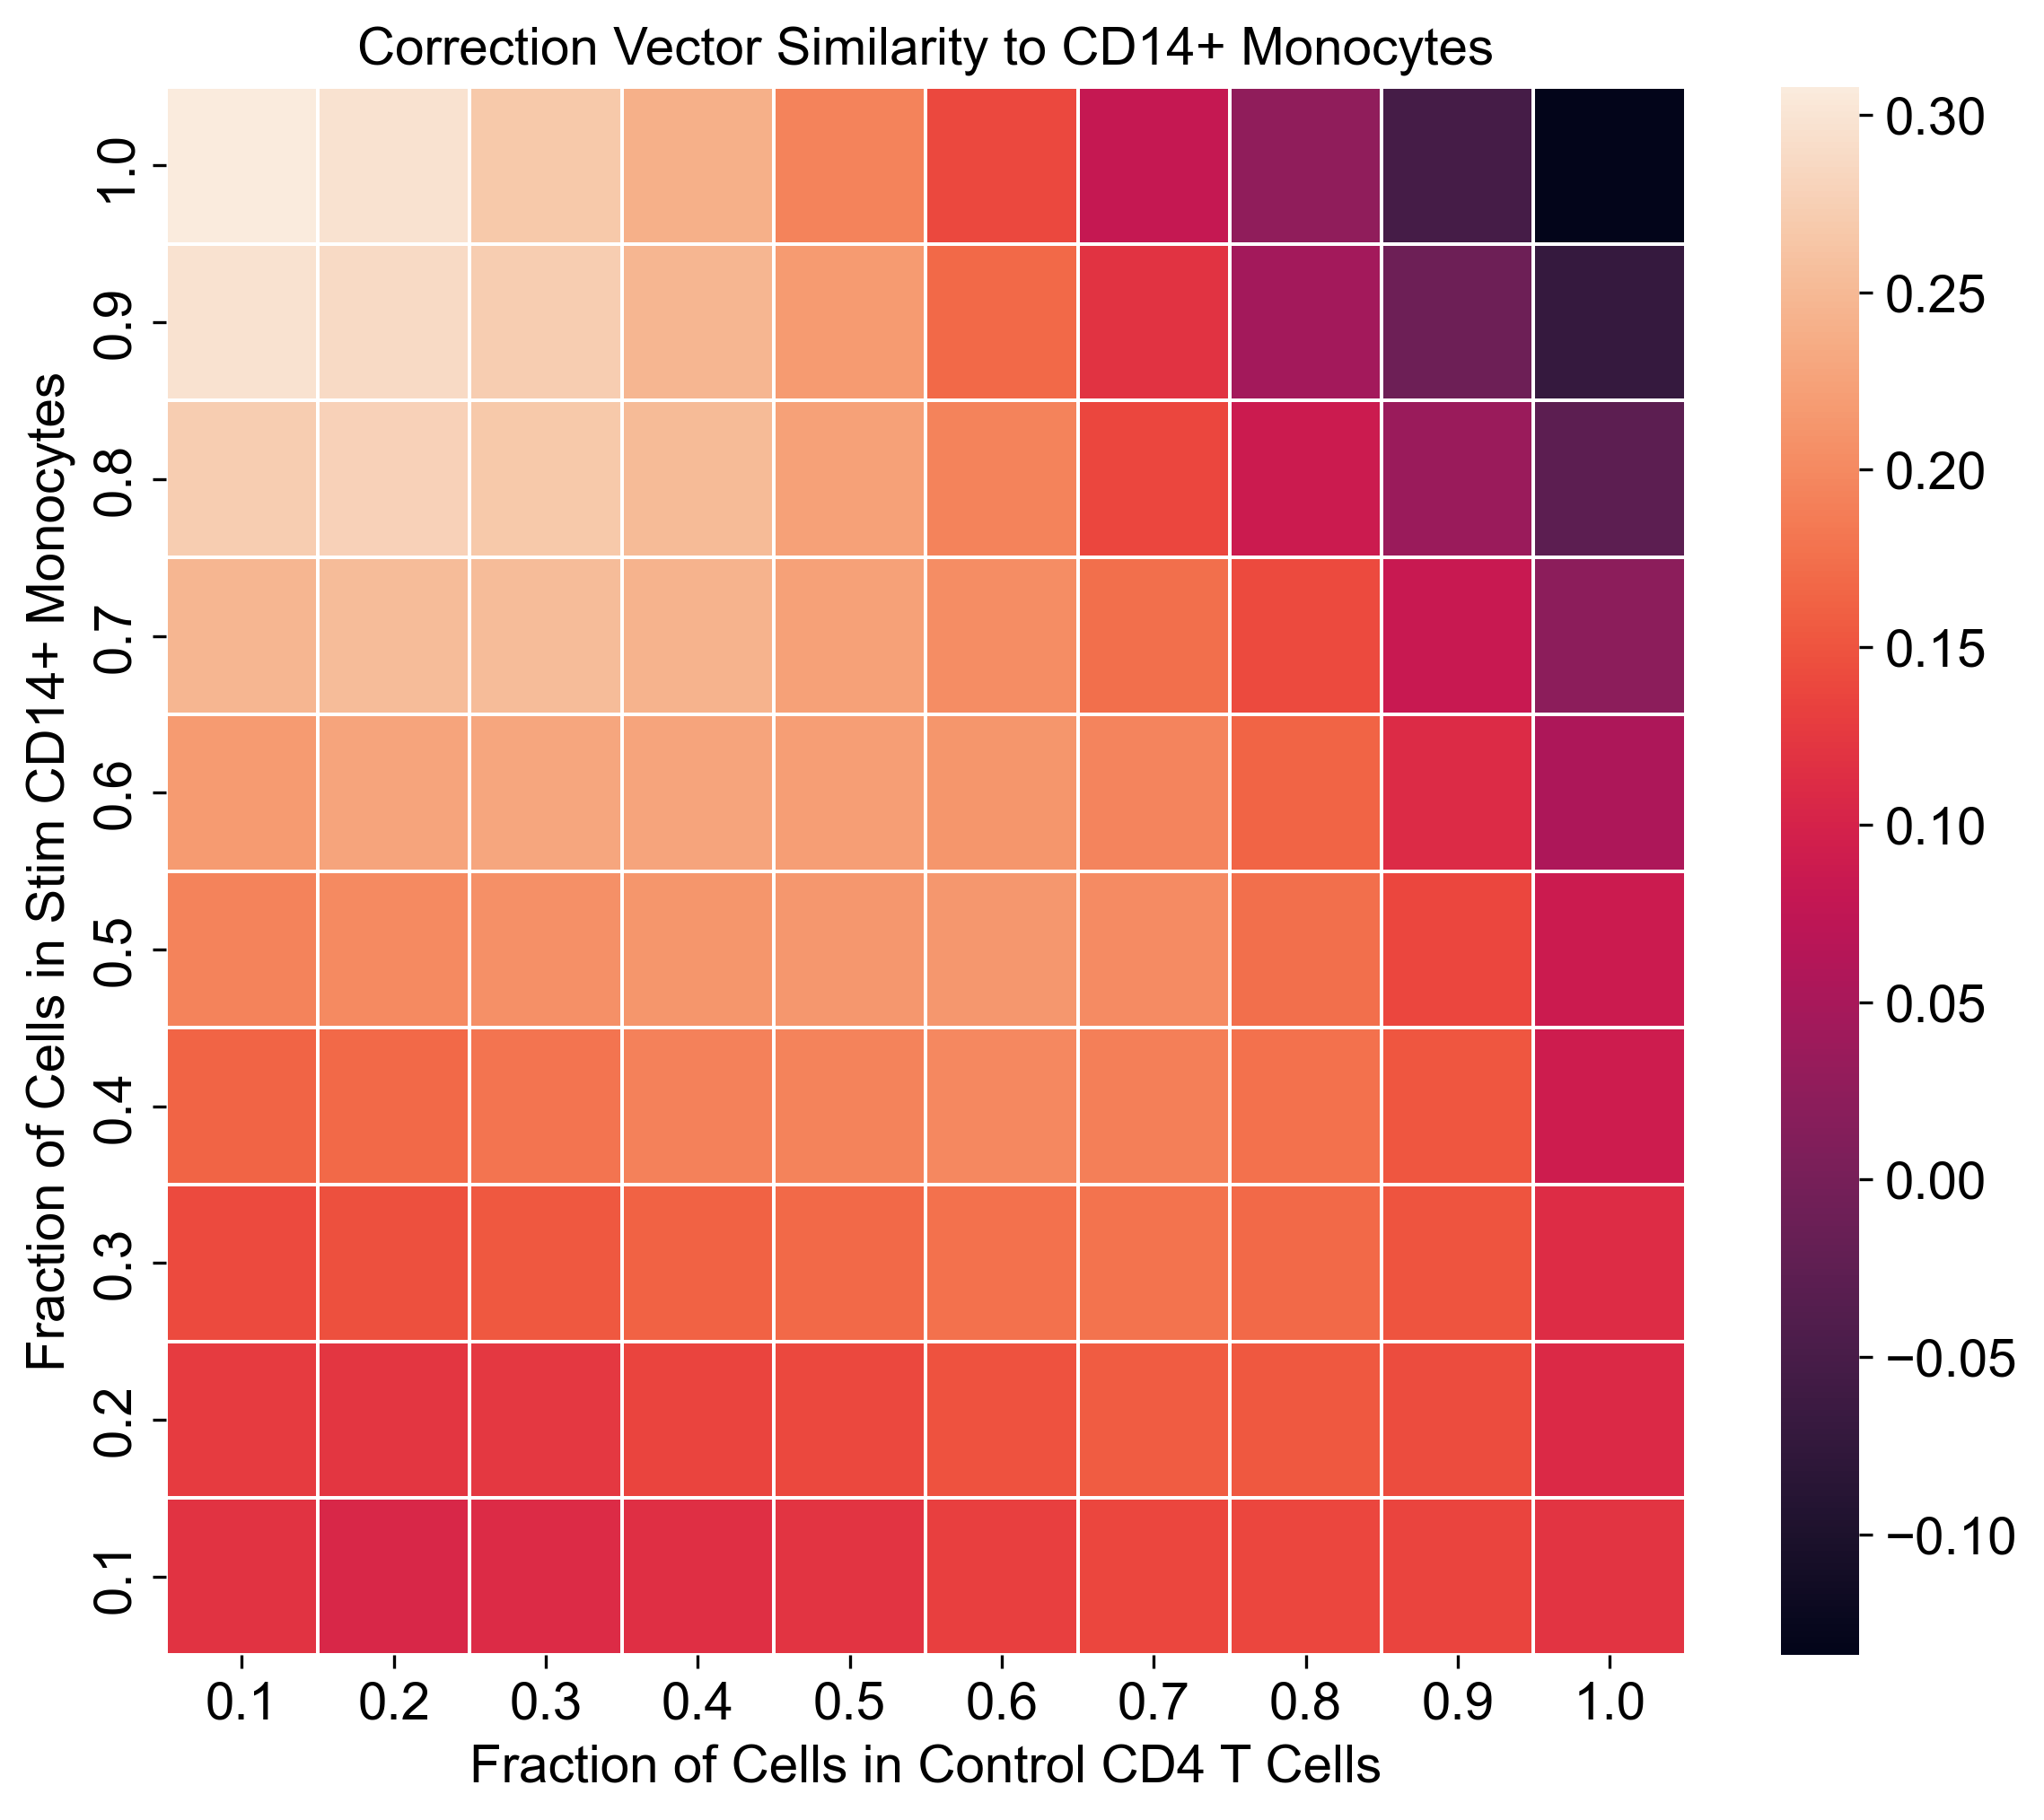

In [25]:
mdf = pandas.DataFrame(data=matrix,columns=list(range(1,11)),index=list(range(1,11)))
fig,ax=plt.subplots(1,1,figsize=(8,7))
sns.heatmap(mdf,ax=ax,linewidth=.5)
ax.set_xlim(0,10)
ax.set_ylim(0,10)
ax.set_xticklabels([str(x/10.) for x in range(1,11)])
ax.set_yticklabels([str(x/10.) for x in range(1,11)])
ax.set_xlabel("Fraction of Cells in Control CD4 T Cells")
ax.set_ylabel("Fraction of Cells in Stim CD14+ Monocytes")
ax.set_title("Correction Vector Similarity to CD14+ Monocytes")
fig.tight_layout()
fig.savefig("/Users/ceglian/rat_cos_isg.pdf")




{'control'}

# Build and Test Batch Correction with Subsampled Matrices

In [13]:
# import numpy
# import random
# from sklearn import metrics

# from sklearn.metrics import silhouette_samples, silhouette_score
# adata = sc.read("PBMC.h5ad")
# print(set(adata.obs["sample"]))

# ctcells = collections.defaultdict(lambda : collections.defaultdict(list))
# for fraction in range(1000):
#     frac_stimul = random.uniform(0,1)
#     frac_control = random.uniform(0,1)
#     adata = sc.read("PBMC.h5ad")
    
#     adata = adata[adata.obs["celltype"].isin(["CD4 T cells","CD14+ Monocytes"])]
#     keep = []
#     for bc, bt, ct in zip(adata.obs.index,adata.obs["sample"],adata.obs["celltype"]):
#         if bt == "stimul":
#             if ct == "CD14+ Monocytes" and frac_control < random.uniform(0,1):
#                 keep.append(bc)
#             if ct == "CD4 T cells" and 1. - frac_control < random.uniform(0,1):
#                 keep.append(bc)
#             else:
#                 continue
#         if bt == "control":
#             if ct == "CD14+ Monocytes" and frac_stimul < random.uniform(0,1):
#                 keep.append(bc)
#             if ct == "CD4 T cells" and 1. - frac_stimul < random.uniform(0,1):
#                 keep.append(bc)
#             else:
#                 continue
#     adata = adata[keep]
#     cell = adata.obs
    
#     cell_control = cell[cell["sample"]=="control"]
#     cell_stimul = cell[cell["sample"]=="stimul"]
    
#     control_mono = len(cell_control[cell_control["celltype"]=="CD14+ Monocytes"].index)
#     control_t = len(cell_control[cell_control["celltype"]=="CD4 T cells"].index) 
#     stim_mono = len(cell_stimul[cell_stimul["celltype"]=="CD14+ Monocytes"].index)
#     stim_t = len(cell_stimul[cell_stimul["celltype"]=="CD4 T cells"].index) 
    
#     print(control_mono, control_t, stim_t, stim_mono)
#     dataset = GeneVectorDataset(adata)
#     cembed = CellEmbedding(dataset, embed)
#     cembed.batch_correct(column="sample",reference=ref)
#     mapped_components = dict(zip(list(cembed.data.keys()),cembed.matrix))
#     adata = adata[list(cembed.data.keys())]
#     scorect = metrics.silhouette_score(cembed.matrix, adata.obs["celltype"], metric='cosine')
#     scores_ct.append(scorect)
#     scorebt = metrics.silhouette_score(cembed.matrix, adata.obs["sample"], metric='cosine')
#     scores_bt.append(scorebt)
#     tcmono.append(control_mono)
#     tct.append(control_t)
#     tsmono.append(stim_t)
#     tst.append(stim_mono)
#     print(scorect, scorebt)

In [15]:
sildf = pandas.DataFrame.from_dict({"num_mono_control":tcmono,
                                    "num_t_control":tct,
                                    "num_mono_stim":tsmono,
                                    "num_t_stim":tst,
                                    "kbet_unc":kbet_unc,
                                    "kbet_cor":kbet_cor})
# sildf = pandas.read_csv("silscore_t_m.csv")
sildf.to_csv("kbet.csv")

In [562]:
fraction_control = []
fraction_stim = []
for x,y,z,w in zip(sildf["num_mono_control"],
                   sildf["num_mono_stim"],
                   sildf["num_t_control"],
                   sildf["num_t_stim"]):
    stim_frac = w / (y + w)
    cont_frac = x / (z + x)
    fraction_control.append(cont_frac)
    fraction_stim.append(stim_frac)
sildf["Stimulated Fraction"] = fraction_stim
sildf["Control Fraction"] = fraction_control
sildf["Ratio"] = numpy.array(fraction_stim) / (numpy.array(fraction_control) + numpy.array(fraction_stim))

In [563]:
fraction_control = []
fraction_stim = []
for x,y,z,w in zip(sildf["num_mono_control"],
                   sildf["num_mono_stim"],
                   sildf["num_t_control"],
                   sildf["num_t_stim"]):
    stim_frac = w / (y + w)
    cont_frac = x / (z + x)
    fraction_control.append(cont_frac)
    fraction_stim.append(stim_frac)
sildf["Stimulated Fraction"] = fraction_stim
sildf["Control Fraction"] = fraction_control
sildf["Ratio"] = numpy.array(fraction_stim) / (numpy.array(fraction_control) + numpy.array(fraction_stim))
lowj = 0.
matrix = []
for j in range(1,11):
    highj = j / 10.
    sub = sildf[sildf["Stimulated Fraction"] >= lowj]
    sub = sub[sub["Stimulated Fraction"] < highj]
    lowi = 0.
    row = []
    for i in range(1,11):
        highi = i / 10.
        subx = sub[sub["Control Fraction"] >= lowi]
        subx = subx[subx["Control Fraction"] < highi]
        row.append(subx["score_ct"].mean())
        lowi = highi
    matrix.append(row)
    lowj = highj
matrix = numpy.array(matrix)
matrix

array([[0.55336293, 0.55099752, 0.52395278, 0.4887594 , 0.41466984,
        0.31198876, 0.21750052, 0.14961299, 0.08907039, 0.04612083],
       [0.52890881, 0.56968198, 0.56893033, 0.55749956, 0.5200716 ,
        0.46341534, 0.3947644 , 0.34297632, 0.25872811, 0.16269967],
       [0.50140814, 0.56380885, 0.59420846, 0.59666807, 0.59100717,
        0.55134803, 0.51803113, 0.44908248, 0.40691581, 0.31629826],
       [0.45591737, 0.54852394, 0.5901309 , 0.62176865, 0.62812362,
        0.61537931, 0.60546646, 0.56341577, 0.50381332, 0.40088006],
       [0.35573114, 0.49816034, 0.56549975, 0.62209215, 0.66190235,
        0.66268013, 0.66700823, 0.63127202, 0.5985912 , 0.52512592],
       [0.32081586, 0.43389436, 0.5436758 , 0.61403906, 0.65936788,
        0.69349272, 0.7008363 , 0.69592096, 0.68305671, 0.63872788],
       [0.22496185, 0.37751412, 0.49171834, 0.57812624, 0.66073037,
        0.70617327, 0.72881705, 0.74569521, 0.7429482 , 0.71470893],
       [0.19696964, 0.32110052, 0.4520190

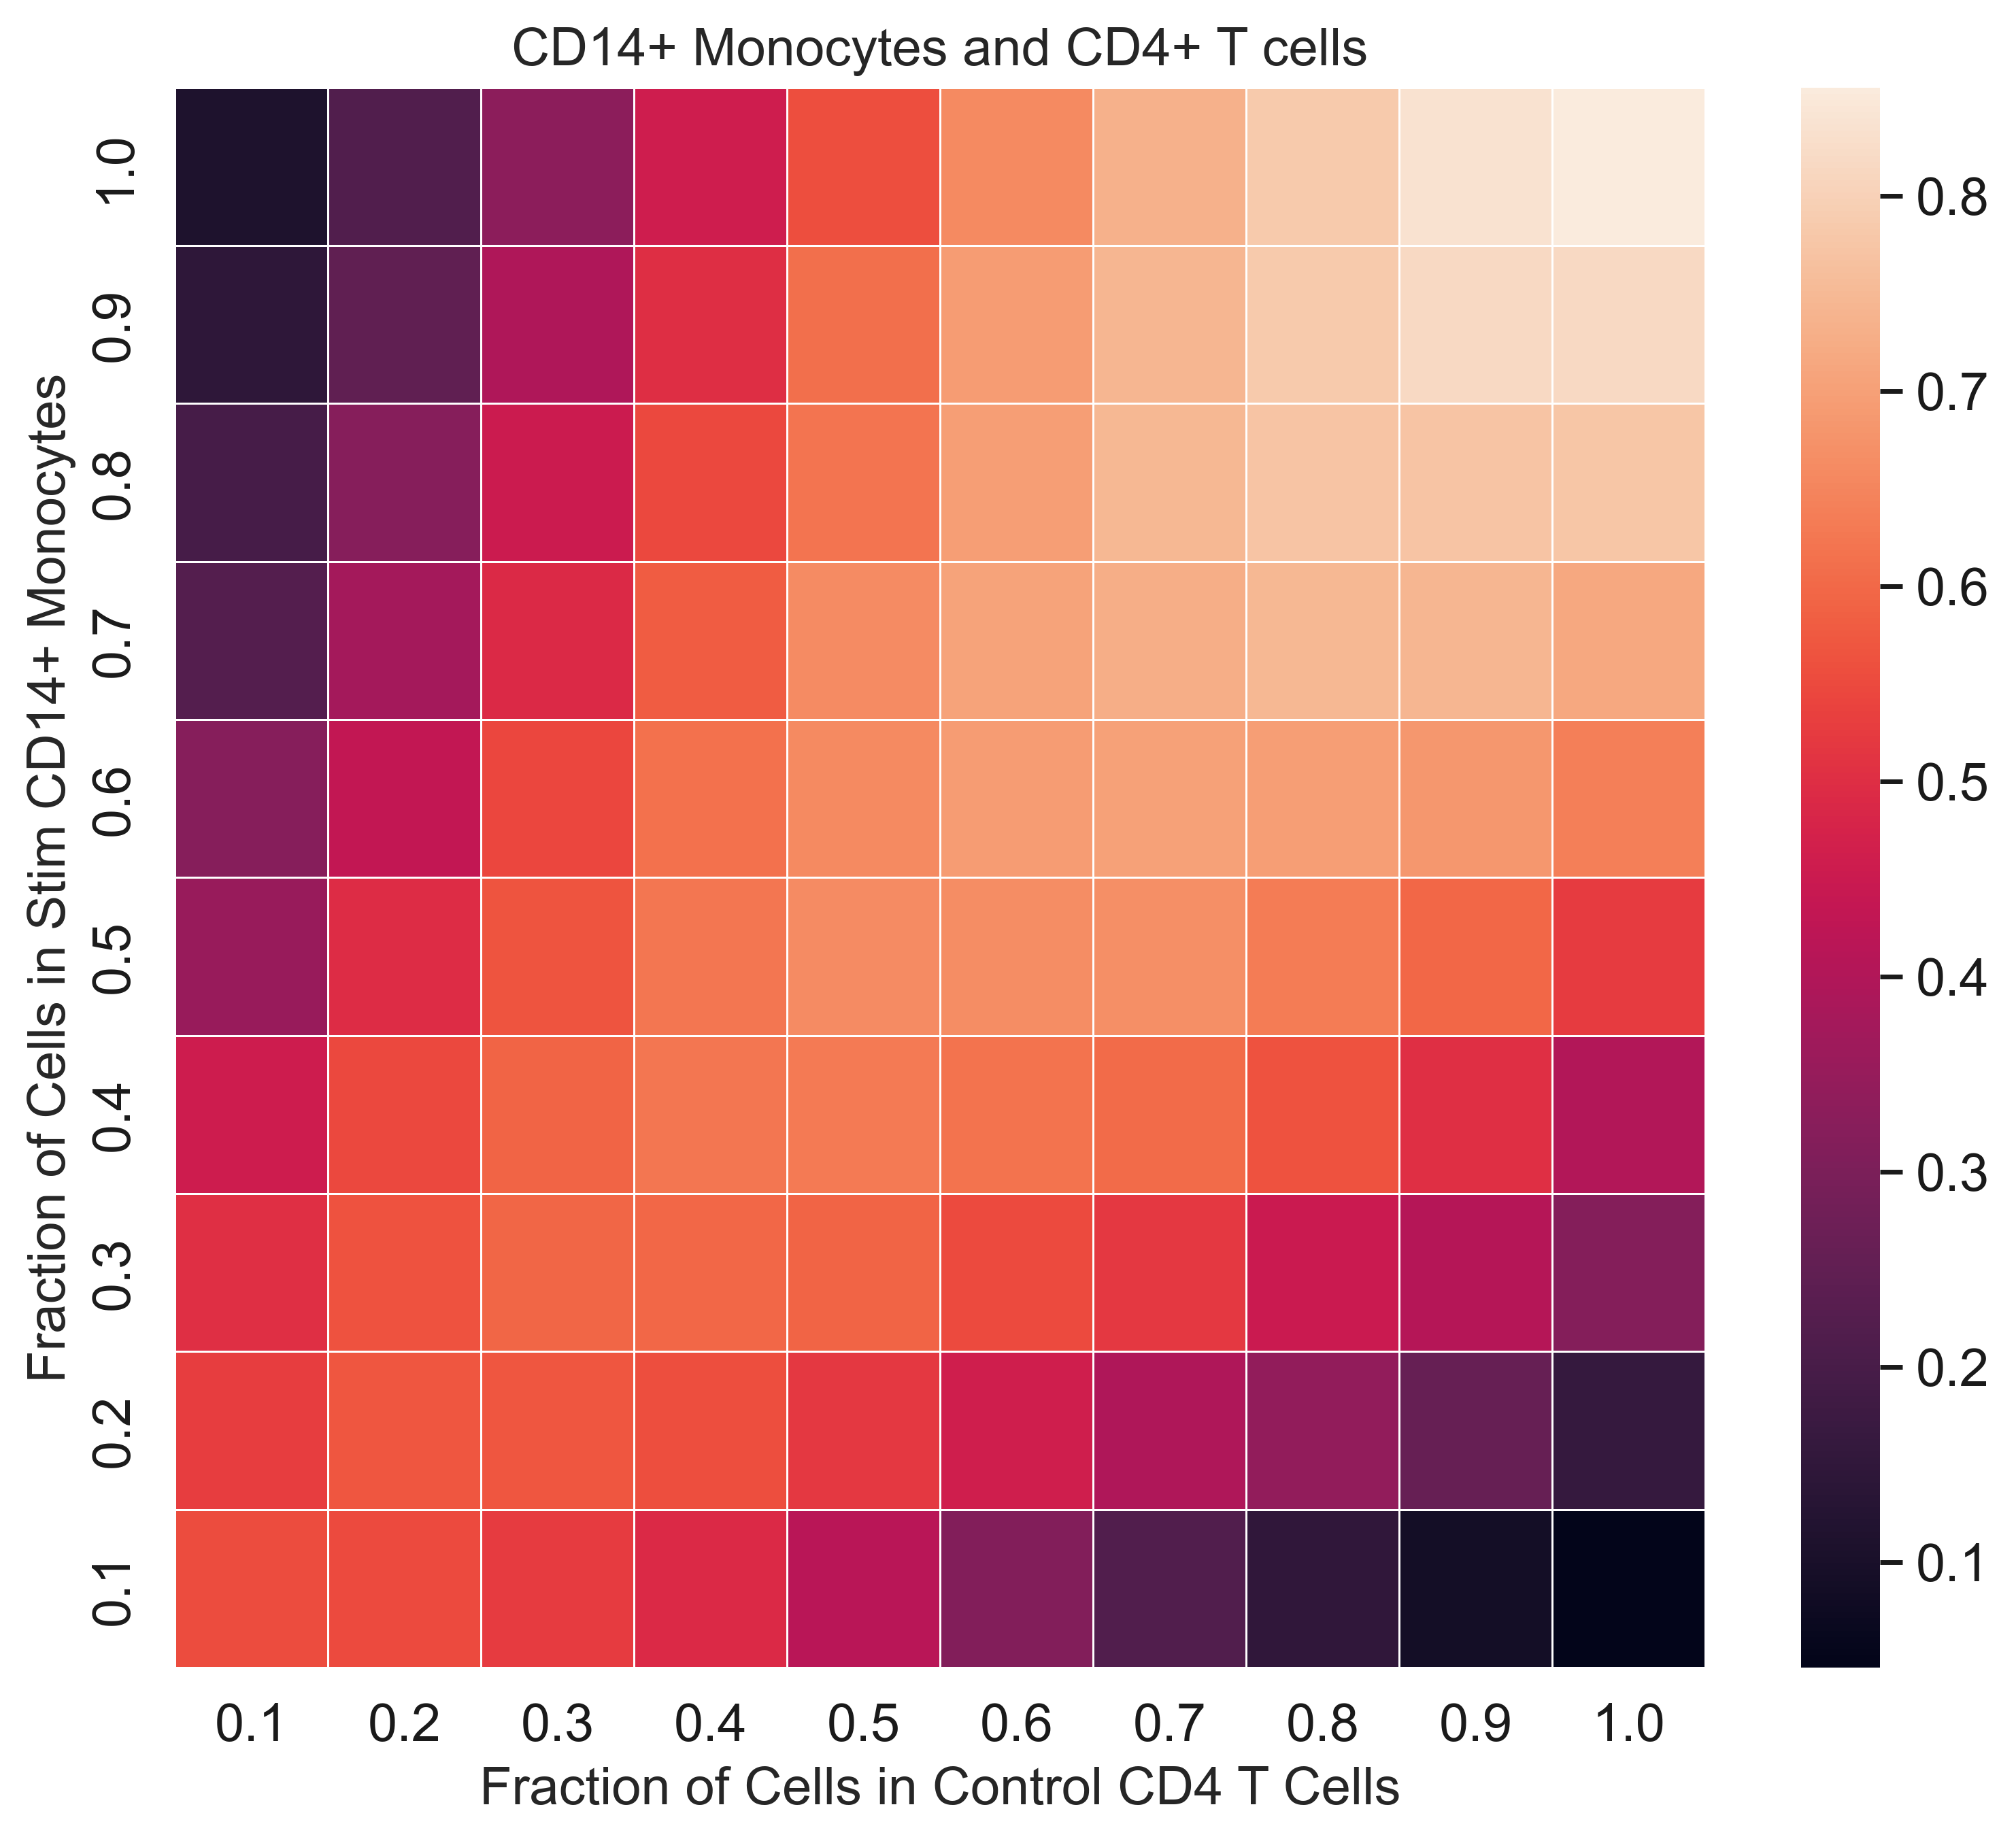

In [564]:
fraction_control = []
fraction_stim = []
for x,y,z,w in zip(sildf["num_mono_control"],
                   sildf["num_mono_stim"],
                   sildf["num_t_control"],
                   sildf["num_t_stim"]):
    stim_frac = w / (y + w)
    cont_frac = x / (z + x)
    fraction_control.append(cont_frac)
    fraction_stim.append(stim_frac)
sildf["Stimulated Fraction"] = fraction_stim
sildf["Control Fraction"] = fraction_control
sildf["Ratio"] = numpy.array(fraction_stim) / (numpy.array(fraction_control) + numpy.array(fraction_stim))
lowj = 0.
matrix = []
for j in range(1,11):
    highj = j / 10.
    sub = sildf[sildf["Stimulated Fraction"] >= lowj]
    sub = sub[sub["Stimulated Fraction"] < highj]
    lowi = 0.
    row = []
    for i in range(1,11):
        highi = i / 10.
        subx = sub[sub["Control Fraction"] >= lowi]
        subx = subx[subx["Control Fraction"] < highi]
        row.append(subx["score_ct"].mean())
        lowi = highi
    matrix.append(row)
    lowj = highj
matrix = numpy.array(matrix)
matrix
mdf = pandas.DataFrame(data=matrix,columns=list(range(1,11)),index=list(range(1,11)))
fig,ax=plt.subplots(1,1,figsize=(8,7))
sns.heatmap(mdf,ax=ax,linewidth=.5)
ax.set_xlim(0,10)
ax.set_ylim(0,10)
ax.set_xticklabels([str(x/10.) for x in range(1,11)])
ax.set_yticklabels([str(x/10.) for x in range(1,11)])
ax.set_xlabel("Fraction of Cells in Control CD4 T Cells")
ax.set_ylabel("Fraction of Cells in Stim CD14+ Monocytes")
ax.set_title("CD14+ Monocytes and CD4+ T cells")
fig.tight_layout()
fig.savefig("/Users/ceglian/rat.pdf")




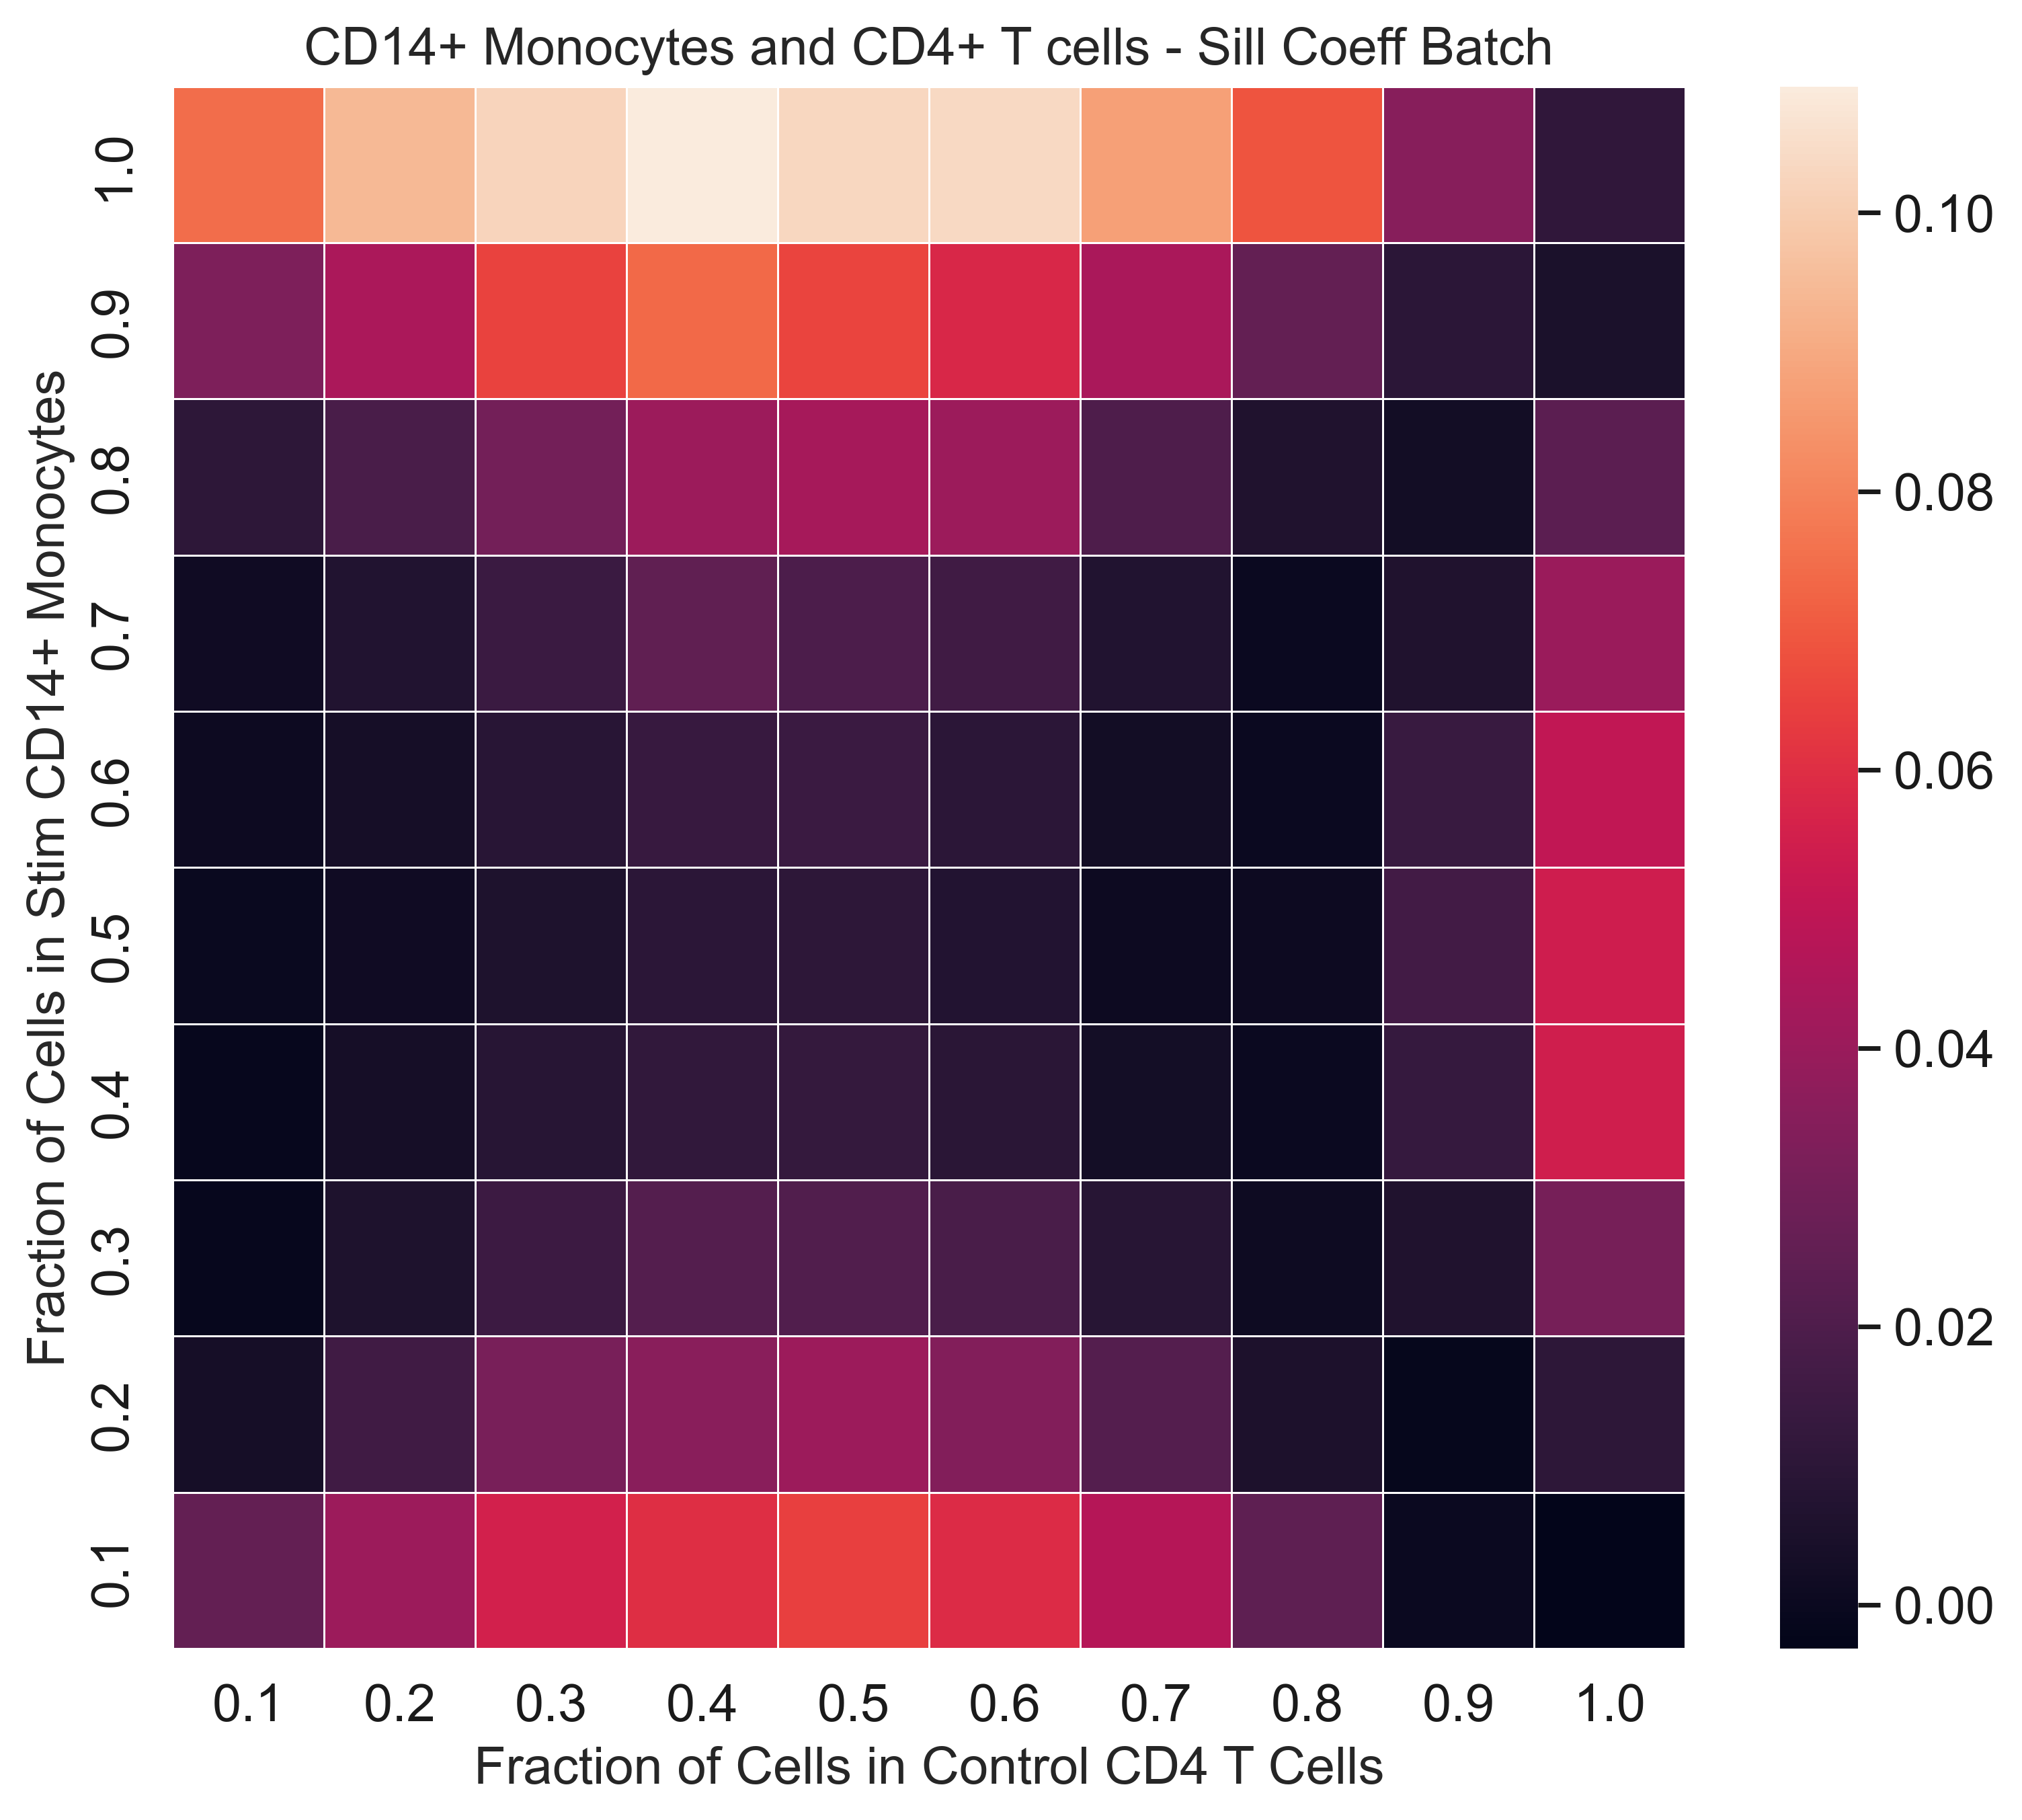

In [559]:
lowj = 0.
matrix = []
for j in range(1,11):
    highj = j / 10.
    sub = sildf[sildf["Stimulated Fraction"] >= lowj]
    sub = sub[sub["Stimulated Fraction"] < highj]
    lowi = 0.
    row = []
    for i in range(1,11):
        highi = i / 10.
        subx = sub[sub["Control Fraction"] >= lowi]
        subx = subx[subx["Control Fraction"] < highi]
        row.append(subx["score_bt"].mean())
        lowi = highi
    matrix.append(row)
    lowj = highj
matrix = numpy.array(matrix)
matrix

mdf = pandas.DataFrame(data=matrix,columns=list(range(1,11)),index=list(range(1,11)))
fig,ax=plt.subplots(1,1,figsize=(8,7))
sns.heatmap(mdf,ax=ax,linewidth=.5)
ax.set_xlim(0,10)
ax.set_ylim(0,10)
ax.set_xticklabels([str(x/10.) for x in range(1,11)])
ax.set_yticklabels([str(x/10.) for x in range(1,11)])
ax.set_xlabel("Fraction of Cells in Control CD4 T Cells")
ax.set_ylabel("Fraction of Cells in Stim CD14+ Monocytes")
ax.set_title("CD14+ Monocytes and CD4+ T cells - Sill Coeff Batch")
fig.tight_layout()
fig.savefig("/Users/ceglian/rat2.pdf")



In [9]:
distances = []
cscore = []
bscore = []
# import numpy
# import random
# from sklearn import metrics

# from sklearn.metrics import silhouette_samples, silhouette_score
# adata = sc.read("PBMC.h5ad")
# cts = set(adata.obs["celltype"])




# ctcells = collections.defaultdict(lambda : collections.defaultdict(list))
# for fraction in range(10000000000000):
#     frac = dict()
#     for bt in set(adata.obs["sample"]):
#         frac[bt] = dict()
#         for ct in set(adata.obs["celltype"]):
#             frac[bt][ct] = random.uniform(0,1)
            
#     adata = sc.read("PBMC.h5ad")
    
#     keep = []
#     for bc, bt, ct in zip(adata.obs.index,adata.obs["sample"],adata.obs["celltype"]):
#         if random.uniform(0,1) < frac[bt][ct]:
#             keep.append(bc)
    
#     adata = adata[keep]
#     probs = dict()
#     for bt in set(adata.obs["sample"]):
#         sub = adata[adata.obs["sample"]==bt]
#         prob = []
#         for ct in cts:
#             prob.append(len(sub[sub.obs["celltype"]==ct]))
#         probs[bt] = prob
#     probs["control"] = numpy.array(probs["control"])
#     probs["stimul"] = numpy.array(probs["stimul"])
#     probs["control"] = probs["control"] / probs["control"].sum()
#     probs["stimul"] = probs["stimul"] / probs["stimul"].sum()
    
#     dist = numpy.linalg.norm((probs["stimul"] - probs["control"]), ord=1)
#     dataset = GeneVectorDataset(adata)
#     cembed = CellEmbedding(dataset, embed)
# #     cembed.batch_correct(column="sample",reference=ref)
#     mapped_components = dict(zip(list(cembed.data.keys()),cembed.matrix))
#     adata = adata[list(cembed.data.keys())]
#     scorect = metrics.silhouette_score(cembed.matrix, adata.obs["celltype"], metric='cosine')
#     cscore.append(scorect)
#     scorebt = metrics.silhouette_score(cembed.matrix, adata.obs["sample"], metric='cosine')
#     bscore.append(scorebt)
#     distances.append(dist)

In [13]:
corrected = scib.integration.harmony(adata, "sample")

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:00)
	Initialization is completed.
	Completed 1 / 10 iteration(s).
	Completed 2 / 10 iteration(s).
	Completed 3 / 10 iteration(s).
	Completed 4 / 10 iteration(s).
Reach convergence after 4 iteration(s).


In [15]:
corrected.X.todense()

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.42368886,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.27204317,
         0.        ],
        [0.        , 0.11724088, 0.        , ..., 0.        , 0.86216927,
         0.        ],
        ...,
        [0.        , 2.851862  , 0.        , ..., 1.401183  , 0.7030975 ,
         0.        ],
        [0.        , 2.1799827 , 0.        , ..., 2.1799827 , 1.5939337 ,
         0.        ],
        [0.        , 3.4776835 , 0.        , ..., 0.        , 1.4203241 ,
         0.        ]], dtype=float32)

In [45]:
from scipy import sparse
adata = sc.read("PBMC.h5ad")
dataset = GeneVectorDataset(adata)
embed = GeneEmbedding("embeddings/pbmc_nextgen.vec", dataset, vector="average")

/Users/ceglian/miniconda3/lib/python3.9/site-packages/anndata/_io/h5ad.py:238: OldFormatWarning: Element '/X' was written without encoding metadata.
  d[k] = read_elem(f[k])
/Users/ceglian/miniconda3/lib/python3.9/site-packages/anndata/_io/specs/methods.py:584: OldFormatWarning: Element '/obs/__categories/batch' was written without encoding metadata.
  categories = read_elem(categories_dset)
/Users/ceglian/miniconda3/lib/python3.9/site-packages/anndata/_io/specs/methods.py:587: OldFormatWarning: Element '/obs/batch' was written without encoding metadata.
  read_elem(dataset), categories, ordered=ordered
/Users/ceglian/miniconda3/lib/python3.9/site-packages/anndata/_io/specs/methods.py:590: OldFormatWarning: Element '/obs/log_counts' was written without encoding metadata.
  return read_elem(dataset)
/Users/ceglian/miniconda3/lib/python3.9/site-packages/anndata/_io/specs/methods.py:590: OldFormatWarning: Element '/obs/n_counts' was written without encoding metadata.
  return read_elem(da

Loading Expression.
Indexing expression.


100%|██████████| 1051348/1051348 [00:00<00:00, 1683419.31it/s]
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:245: ResourceWarning: unclosed file <_io.TextIOWrapper name='embeddings/pbmc_nextgen.vec' mode='r' encoding='UTF-8'>
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:245: ResourceWarning: unclosed file <_io.TextIOWrapper name='embeddings/pbmc_nextgen2.vec' mode='r' encoding='UTF-8'>
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:64: ResourceWarning: unclosed file <_io.TextIOWrapper name='embeddings/pbmc_nextgen_avg.vec' mode='r' encoding='UTF-8'>


Finished.
Loading average of 1st and 2nd weights.


100%|██████████| 1000/1000 [00:00<00:00, 3530558.92it/s]


In [89]:
import scib
def kbet(adata):
    return scib.me.kBET(adata, batch_key="sample", label_key="celltype", type_="embed", embed="X_emb")

def kbet_per_celltype(adata):
    df = scib.me.kBET(adata, batch_key="sample", 
                        label_key="celltype", type_="embed", 
                        embed="X_emb", return_df=True)
    return dict(zip(df["cluster"],df["kBET"]))

def graph_connectivity(adata):
    return scib.me.graph_connectivity(adata, label_key="celltype")

def sil_batch(adata):
    df = scib.me.silhouette_batch(adata, 
                                    batch_key="sample", 
                                    label_key="celltype", metric='cosine',
                                    embed="X_emb",return_all=True)
    avg = df[0]
    score = dict(zip(df[1].index,df[1]["silhouette_score"]))
    return avg, score["CD14+ Monocytes"], score["CD4 T cells"]

def ari_calc(adata):
    scib.me.cluster_optimal_resolution(adata, cluster_key="cluster", label_key="celltype")
    res = scib.me.ari(adata, cluster_key="cluster", label_key="celltype")
    return res

def ilisi(adata):
    scib.me.ilisi_graph(adata, batch_key="sample", type_="embed", use_rep="X_emb")

def pcr(uncorrected, corrected):
    scib.me.pcr_comparison(uncorrected, corrected, covariate="batch", embed="X_emb")

def clisi(adata):
    scib.me.clisi_graph(adata, label_key="celltype", type_="embed", use_rep="X_emb")

def asw(adata):
    return scib.me.isolated_labels_asw(corrected, 
                                batch_key="sample", 
                                label_key="celltype", 
                                embed="X_emb")

def f1(adata):
    return scib.me.isolated_labels_f1(corrected, 
                                      batch_key="batch", 
                                      label_key="celltype",
                                      embed="X_emb")
def nmi(adata):
    sc.pp.neighbors(adata, use_rep="X_emb")
    scib.me.cluster_optimal_resolution(adata, cluster_key="cluster", label_key="celltype")
    scib.me.nmi(adata, cluster_key="cluster", label_key="celltype")

def sil_ct(adata):
    return scib.me.silhouette(corrected, label_key="celltype", embed="X_emb", metric="cosine")
    
kbet_unc = []
kbet_mono_cor = []
kbet_t_cor = []
kbet_mono_unc = []
kbet_t_unc = []
graph_unc = []
graph_cor = []
ari_unc = []
ari_cor = []
sil_mono_unc = []
sil_t_unc = []
sil_mono_cor = []
sil_t_cor = []
sil_cor = []
sil_unc = []
ilisi_unc = []
ilisi_cor = []
pcr_val = []
clisi_cor = []
clisi_unc = []

asw_cor = []
asw_unc = []

nmi_cor = []
nmi_unc = []

f1_cor = []
f1_unc = []

sil_ct_inc = []
sil_ct_cor = []

kbet_cor = []
tcmono = []
tct = []
tsmono = []
tst = []

def build_new(dataset, embed):
    cembed = CellEmbedding(dataset, embed)
    uncorrected = cembed.get_adata()
    uncorrected.obsm["X_emb"] = uncorrected.obsm["X_genevector"]
    cembed.batch_correct(column="sample",reference="control")
    corrected = cembed.get_adata()
    corrected.obsm["X_emb"] = corrected.obsm["X_genevector"]
    return corrected, uncorrected

from IPython.display import clear_output

import numpy
import random
import pandas
from sklearn import metrics
from sklearn.metrics.pairwise import cosine_similarity

from sklearn.metrics import silhouette_samples, silhouette_score
from scipy import sparse

for fraction in range(100000):
    frac_stimul = random.uniform(0,1)
    frac_control = random.uniform(0,1)
    adata = sc.read("PBMC.h5ad")
    adata.X = sparse.csr_matrix(adata.X)
    
    adata = adata[adata.obs["celltype"].isin(["CD4 T cells","CD14+ Monocytes"])]
    keep = []
    for bc, bt, ct in zip(adata.obs.index,adata.obs["sample"],adata.obs["celltype"]):
        if bt == "stimul":
            if ct == "CD14+ Monocytes" and frac_control < random.uniform(0,1):
                keep.append(bc)
            elif ct == "CD4 T cells" and 1. - frac_control < random.uniform(0,1):
                keep.append(bc)
            else:
                continue
        if bt == "control":
            if ct == "CD14+ Monocytes" and frac_stimul < random.uniform(0,1):
                keep.append(bc)
            elif ct == "CD4 T cells" and 1. - frac_stimul < random.uniform(0,1):
                keep.append(bc)
            else:
                continue

    adata = adata[keep]
    
    cell = adata.obs
    dataset = GeneVectorDataset(adata)
    cell_control = cell[cell["sample"]=="control"]
    cell_stimul = cell[cell["sample"]=="stimul"]
    
    control_mono = len(cell_control[cell_control["celltype"]=="CD14+ Monocytes"].index)
    control_t = len(cell_control[cell_control["celltype"]=="CD4 T cells"].index) 
    stim_mono = len(cell_stimul[cell_stimul["celltype"]=="CD14+ Monocytes"].index)
    stim_t = len(cell_stimul[cell_stimul["celltype"]=="CD4 T cells"].index) 

    print(control_mono, control_t, stim_t, stim_mono)
    tcmono.append(control_mono)
    tct.append(control_t)
    tsmono.append(stim_t)
    tst.append(stim_mono)
    corrected, uncorrected = build_new(dataset, embed)
    kbet_cor.append(kbet(corrected))
    kbet_unc.append(kbet(uncorrected))
    
    unc_ct_kbet = kbet_per_celltype(uncorrected)
    kbet_mono_unc.append(unc_ct_kbet["CD14+ Monocytes"])
    kbet_t_unc.append(unc_ct_kbet["CD4 T cells"])
    
    unc_ct_kbet = kbet_per_celltype(corrected)
    kbet_mono_cor.append(unc_ct_kbet["CD14+ Monocytes"])
    kbet_t_cor.append(unc_ct_kbet["CD4 T cells"])
    
    graph_cor.append(graph_connectivity(corrected))
    graph_unc.append(graph_connectivity(uncorrected))
    
    ilisi_cor.append(ilisi(corrected))
    ilisi_unc.append(ilisi(uncorrected))
    
    pcr_val.append(pcr(uncorrected,corrected))
    
    ari_unc.append(ari_calc(uncorrected))
    ari_cor.append(ari_calc(corrected))
    
    clisi_unc.append(clisi(uncorrected))
    clisi_cor.append(clisi(corrected))

    nmi_unc.append(nmi(uncorrected))
    nmi_cor.append(nmi(corrected))

    f1_unc.append(f1(uncorrected))
    f1_cor.append(f1(corrected))

    asw_unc.append(asw(uncorrected))
    asw_cor.append(asw(corrected))

    sil_ct_inc.append(sil_ct(uncorrected))
    sil_ct_cor.append(sil_ct(corrected))
    
    unc_sil, unc_mono_sil, unc_t_sil = sil_batch(uncorrected)
    sil_t_unc.append(unc_t_sil)
    sil_mono_unc.append(unc_mono_sil)
    sil_unc.append(unc_sil)

    unc_sil, unc_mono_sil, unc_t_sil = sil_batch(corrected)
    sil_t_cor.append(unc_t_sil)
    sil_mono_cor.append(unc_mono_sil)
    sil_cor.append(unc_sil)
    
    print(kbet_cor[-1],kbet_unc[-1])
    sildf = pandas.DataFrame.from_dict({"num_mono_control":tcmono,
                                        "num_t_control":tct,
                                        "num_mono_stim":tsmono,
                                        "num_t_stim":tst,
                                        "kbet_unc":kbet_unc,
                                        "kbet_cor":kbet_cor,
                                        "kbet_unc_mono":kbet_mono_unc,
                                        "kbet_unc_t":kbet_t_unc,
                                        "kbet_cor_mono":kbet_mono_cor,
                                        "kbet_cor_t":kbet_t_cor,
                                        "graph_cor":graph_cor,
                                        "graph_unc":graph_unc,
                                        "ari_unc":ari_unc,
                                        "ari_cor":ari_cor,
                                        "sil_cor":sil_cor,
                                        "sil_unc":sil_unc,
                                        "sil_mono_cor":sil_mono_cor,
                                        "sil_t_cor":sil_t_cor,
                                        "sil_mono_unc":sil_mono_unc,
                                        "sil_t_unc":sil_t_unc,
                                        "clisi_unc":clisi_unc,
                                        "clisi_cor":clisi_cor,
                                        "pcr":pcr_val,
                                        "nmi_cor":nmi_cor,
                                        "nmi_unc":nmi_unc,
                                        "asw_cor":asw_cor,
                                        "asw_unc":asw_unc,
                                        "f1_unc":f1_unc,
                                        "f1_cor":f1_cor,
                                        "sil_ct_cor":sil_ct_cor,
                                        "sil_ct_unc":sil_ct_inc})
    sildf.to_csv("batch_metrics2.csv")
    clear_output()

/Users/ceglian/miniconda3/lib/python3.9/site-packages/anndata/_io/h5ad.py:238: OldFormatWarning: Element '/X' was written without encoding metadata.
  d[k] = read_elem(f[k])
/Users/ceglian/miniconda3/lib/python3.9/site-packages/anndata/_io/specs/methods.py:584: OldFormatWarning: Element '/obs/__categories/batch' was written without encoding metadata.
  categories = read_elem(categories_dset)
/Users/ceglian/miniconda3/lib/python3.9/site-packages/anndata/_io/specs/methods.py:587: OldFormatWarning: Element '/obs/batch' was written without encoding metadata.
  read_elem(dataset), categories, ordered=ordered
/Users/ceglian/miniconda3/lib/python3.9/site-packages/anndata/_io/specs/methods.py:590: OldFormatWarning: Element '/obs/log_counts' was written without encoding metadata.
  return read_elem(dataset)
/Users/ceglian/miniconda3/lib/python3.9/site-packages/anndata/_io/specs/methods.py:590: OldFormatWarning: Element '/obs/n_counts' was written without encoding metadata.
  return read_elem(da

Loading Expression.
Indexing expression.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 442029/442029 [00:00<00:00, 1780952.88it/s]

Finished.
1545 670 148 1984
normalizing counts per cell
    finished (0:00:00)



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 442029/442029 [00:00<00:00, 594598.91it/s]


Generating Cell Vectors.


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4347/4347 [00:00<00:00, 20331.05it/s]

Found 0 Cells with No Counts.
Finished.
Loading embedding in X_genevector.
Running Scanpy neighbors and umap.
computing neighbors


    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:06)
Generating batch vectors.
Computing correction vector for stimul.
Applying correction vectors.
Loading embedding in X_genevector.
Running Scanpy neighbors and umap.
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:06)
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)


/Users/ceglian/miniconda3/lib/python3.9/site-packages/rpy2/robjects/pandas2ri.py:356: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  warnings.warn('The global conversion available with activate() '
/Users/ceglian/miniconda3/lib/python3.9/site-packages/rpy2/robjects/numpy2ri.py:234: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  warnings.warn('The global conversion available with activate() '
/Users/ceglian/miniconda3/lib/python3.9/site-packages/rpy2/robjects/conversion.py:28: DeprecationWarning: The use of converter in module rpy2.robjects.conversion is deprecated. Use rpy2.robjects.conversion.get_conversion() instead of rpy2.robjects.conversion.converter.
  warnings.warn(


computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)


/Users/ceglian/miniconda3/lib/python3.9/site-packages/rpy2/robjects/pandas2ri.py:356: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  warnings.warn('The global conversion available with activate() '
/Users/ceglian/miniconda3/lib/python3.9/site-packages/rpy2/robjects/numpy2ri.py:234: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  warnings.warn('The global conversion available with activate() '
/Users/ceglian/miniconda3/lib/python3.9/site-packages/rpy2/robjects/conversion.py:28: DeprecationWarning: The use of converter in module rpy2.robjects.conversion is deprecated. Use rpy2.robjects.conversion.get_conversion() instead of rpy2.robjects.conversion.converter.
  warnings.warn(


computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)


/Users/ceglian/miniconda3/lib/python3.9/site-packages/rpy2/robjects/pandas2ri.py:356: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  warnings.warn('The global conversion available with activate() '
/Users/ceglian/miniconda3/lib/python3.9/site-packages/rpy2/robjects/numpy2ri.py:234: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  warnings.warn('The global conversion available with activate() '
/Users/ceglian/miniconda3/lib/python3.9/site-packages/rpy2/robjects/conversion.py:28: DeprecationWarning: The use of converter in module rpy2.robjects.conversion is deprecated. Use rpy2.robjects.conversion.get_conversion() instead of rpy2.robjects.conversion.converter.
  warnings.warn(


computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)


/Users/ceglian/miniconda3/lib/python3.9/site-packages/rpy2/robjects/pandas2ri.py:356: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  warnings.warn('The global conversion available with activate() '
/Users/ceglian/miniconda3/lib/python3.9/site-packages/rpy2/robjects/numpy2ri.py:234: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  warnings.warn('The global conversion available with activate() '
/Users/ceglian/miniconda3/lib/python3.9/site-packages/rpy2/robjects/conversion.py:28: DeprecationWarning: The use of converter in module rpy2.robjects.conversion is deprecated. Use rpy2.robjects.conversion.get_conversion() instead of rpy2.robjects.conversion.converter.
  warnings.warn(


computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing PCA
    with n_comps=50
    finished (0:00:00)
computing PCA
    with n_comps=50
    finished (0:00:00)
running Leiden clustering
    finished: found 3 clusters and added
    'cluster', the cluster labels (adata.obs, categorical) (0:00:00)
resolution: 0.1, nmi: 0.625707331556332
running Leiden clustering
    finished: found 4 clusters and added
    'cluster', the cluster labels (adata.obs, categorical) (0:00:00)
resolution: 0.2, nmi: 0.5936445970141494
running Leiden clustering
    finished: found 4 clusters and added
    'cluster', the cluster labels (adata.obs, categorical) (0:00:00)
resolution:

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
running Leiden clustering
    finished: found 3 clusters and added
    'cluster', the cluster labels (adata.obs, categorical) (0:00:00)
resolution: 0.1, nmi: 0.6130247675461096
running Leiden clustering
    finished: found 4 clusters and added
    'cluster', the cluster labels (adata.obs, categorical) (0:00:00)
resolution: 0.2, nmi: 0.5836347133380398
running Leiden clustering
    finished: found 4 clusters and added
    'cluster', the cluster labels (adata.obs, categorical) (0:00:00)
resolution: 0.3, nmi: 0.5836347133380398
running Leiden clustering
    finished: found 4 clusters and added
    'cluster', the cluster labels (adata.obs, categorical) (0:00:00)
resolution: 0.4, nmi: 0.5836347133380398
running Leiden clustering
    finished: found 4 clusters and added
    'cluster', the cluster label

    finished: found 3 clusters and added
    'iso_label', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 3 clusters and added
    'iso_label', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 4 clusters and added
    'iso_label', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 4 clusters and added
    'iso_label', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 5 clusters and added
    'iso_label', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 7 clusters and added
    'iso_label', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 8 clusters and added
    'iso_label', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 10 clusters an

running Leiden clustering
    finished: found 17 clusters and added
    'iso_label', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 19 clusters and added
    'iso_label', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 20 clusters and added
    'iso_label', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 21 clusters and added
    'iso_label', the cluster labels (adata.obs, categorical) (0:00:00)
CD14+ Monocytes: 0.7480510276399716
Compute neighbors on rep X_emb
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
running Leiden clustering
    finished: found 3 clusters and added
    'iso_label', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 

ValueError: All arrays must be of the same length

/Users/ceglian/miniconda3/lib/python3.9/site-packages/seaborn/matrix.py:306: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  mesh = ax.pcolormesh(self.plot_data, cmap=self.cmap, **kws)


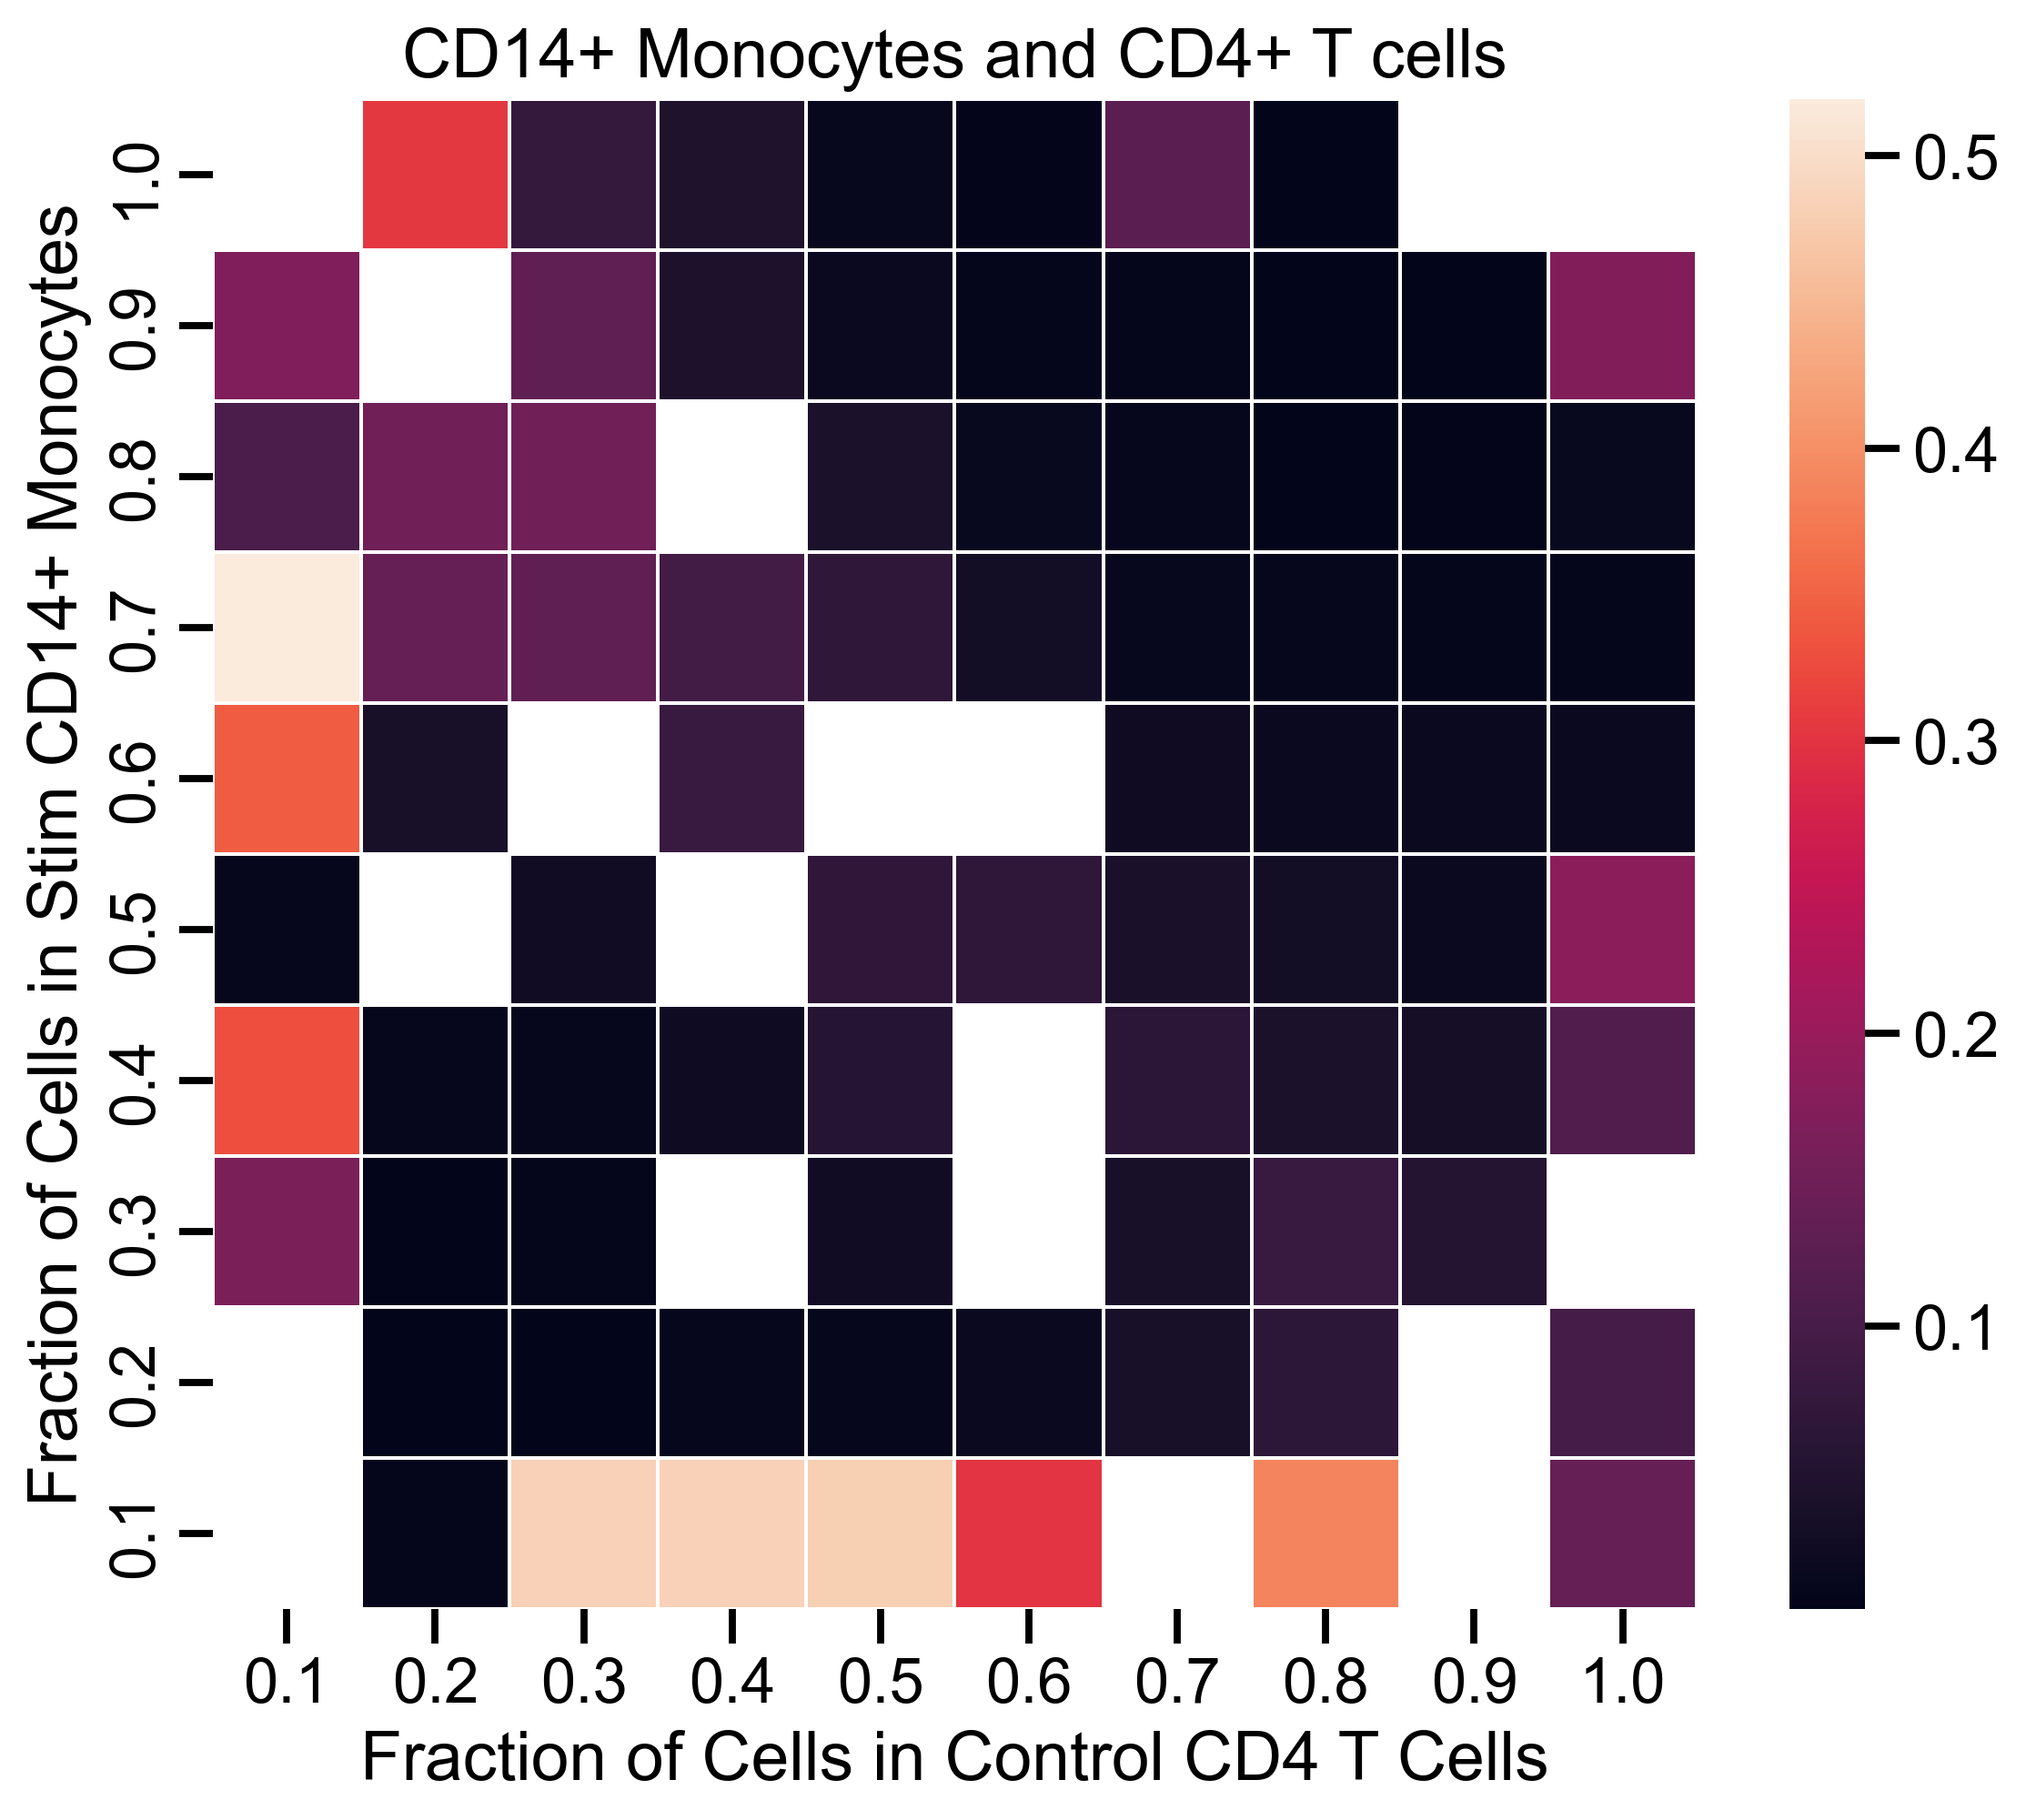

In [88]:
fraction_control = []
fraction_stim = []
for x,y,z,w in zip(sildf["num_mono_control"],
                   sildf["num_mono_stim"],
                   sildf["num_t_control"],
                   sildf["num_t_stim"]):
    stim_frac = y / (y + w)
    cont_frac = x / (z + x)
    fraction_control.append(cont_frac)
    fraction_stim.append(stim_frac)
sildf["Stimulated Fraction"] = fraction_stim
sildf["Control Fraction"] = fraction_control
sildf["Ratio"] = numpy.array(fraction_stim) / (numpy.array(fraction_control) + numpy.array(fraction_stim))
lowj = 0.
matrix = []
for j in range(1,11):
    highj = j / 10.
    sub = sildf[sildf["Stimulated Fraction"] >= lowj]
    sub = sub[sub["Stimulated Fraction"] < highj]
    lowi = 0.
    row = []
    for i in range(1,11):
        highi = i / 10.
        subx = sub[sub["Control Fraction"] >= lowi]
        subx = subx[subx["Control Fraction"] < highi]
        row.append(subx["kbet_cor"].mean())
        lowi = highi
    matrix.append(row)
    lowj = highj
matrix = numpy.array(matrix)
matrix
import matplotlib.pyplot as plt
import seaborn as sns
mdf = pandas.DataFrame(data=matrix,columns=list(range(1,11)),index=list(range(1,11)))
fig,ax=plt.subplots(1,1,figsize=(8,7))
sns.heatmap(mdf,ax=ax,linewidth=.5)
ax.set_xlim(0,10)
ax.set_ylim(0,10)
ax.set_xticklabels([str(x/10.) for x in range(1,11)])
ax.set_yticklabels([str(x/10.) for x in range(1,11)])
ax.set_xlabel("Fraction of Cells in Control CD4 T Cells")
ax.set_ylabel("Fraction of Cells in Stim CD14+ Monocytes")
ax.set_title("CD14+ Monocytes and CD4+ T cells")
fig.tight_layout()
fig.savefig("/Users/ceglian/rat.pdf")




In [465]:
sildistnc = pandas.DataFrame.from_dict({"l1dist":distances,
                                        "score_ct":cscore,
                                        "score_bt":bscore})
sildistnc["Correction"] = "None"
sildist = pandas.read_csv("sildist.csv")
sildist["Correction"] = "Batch Correction"
sdf = pandas.concat([sildistnc,sildist])
sdf = sdf[["l1dist","score_ct","score_bt","Correction"]]

scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.22.4 scipy==1.9.0 pandas==1.5.1 scikit-learn==1.0.2 statsmodels==0.13.2 python-igraph==0.9.11 pynndescent==0.5.7


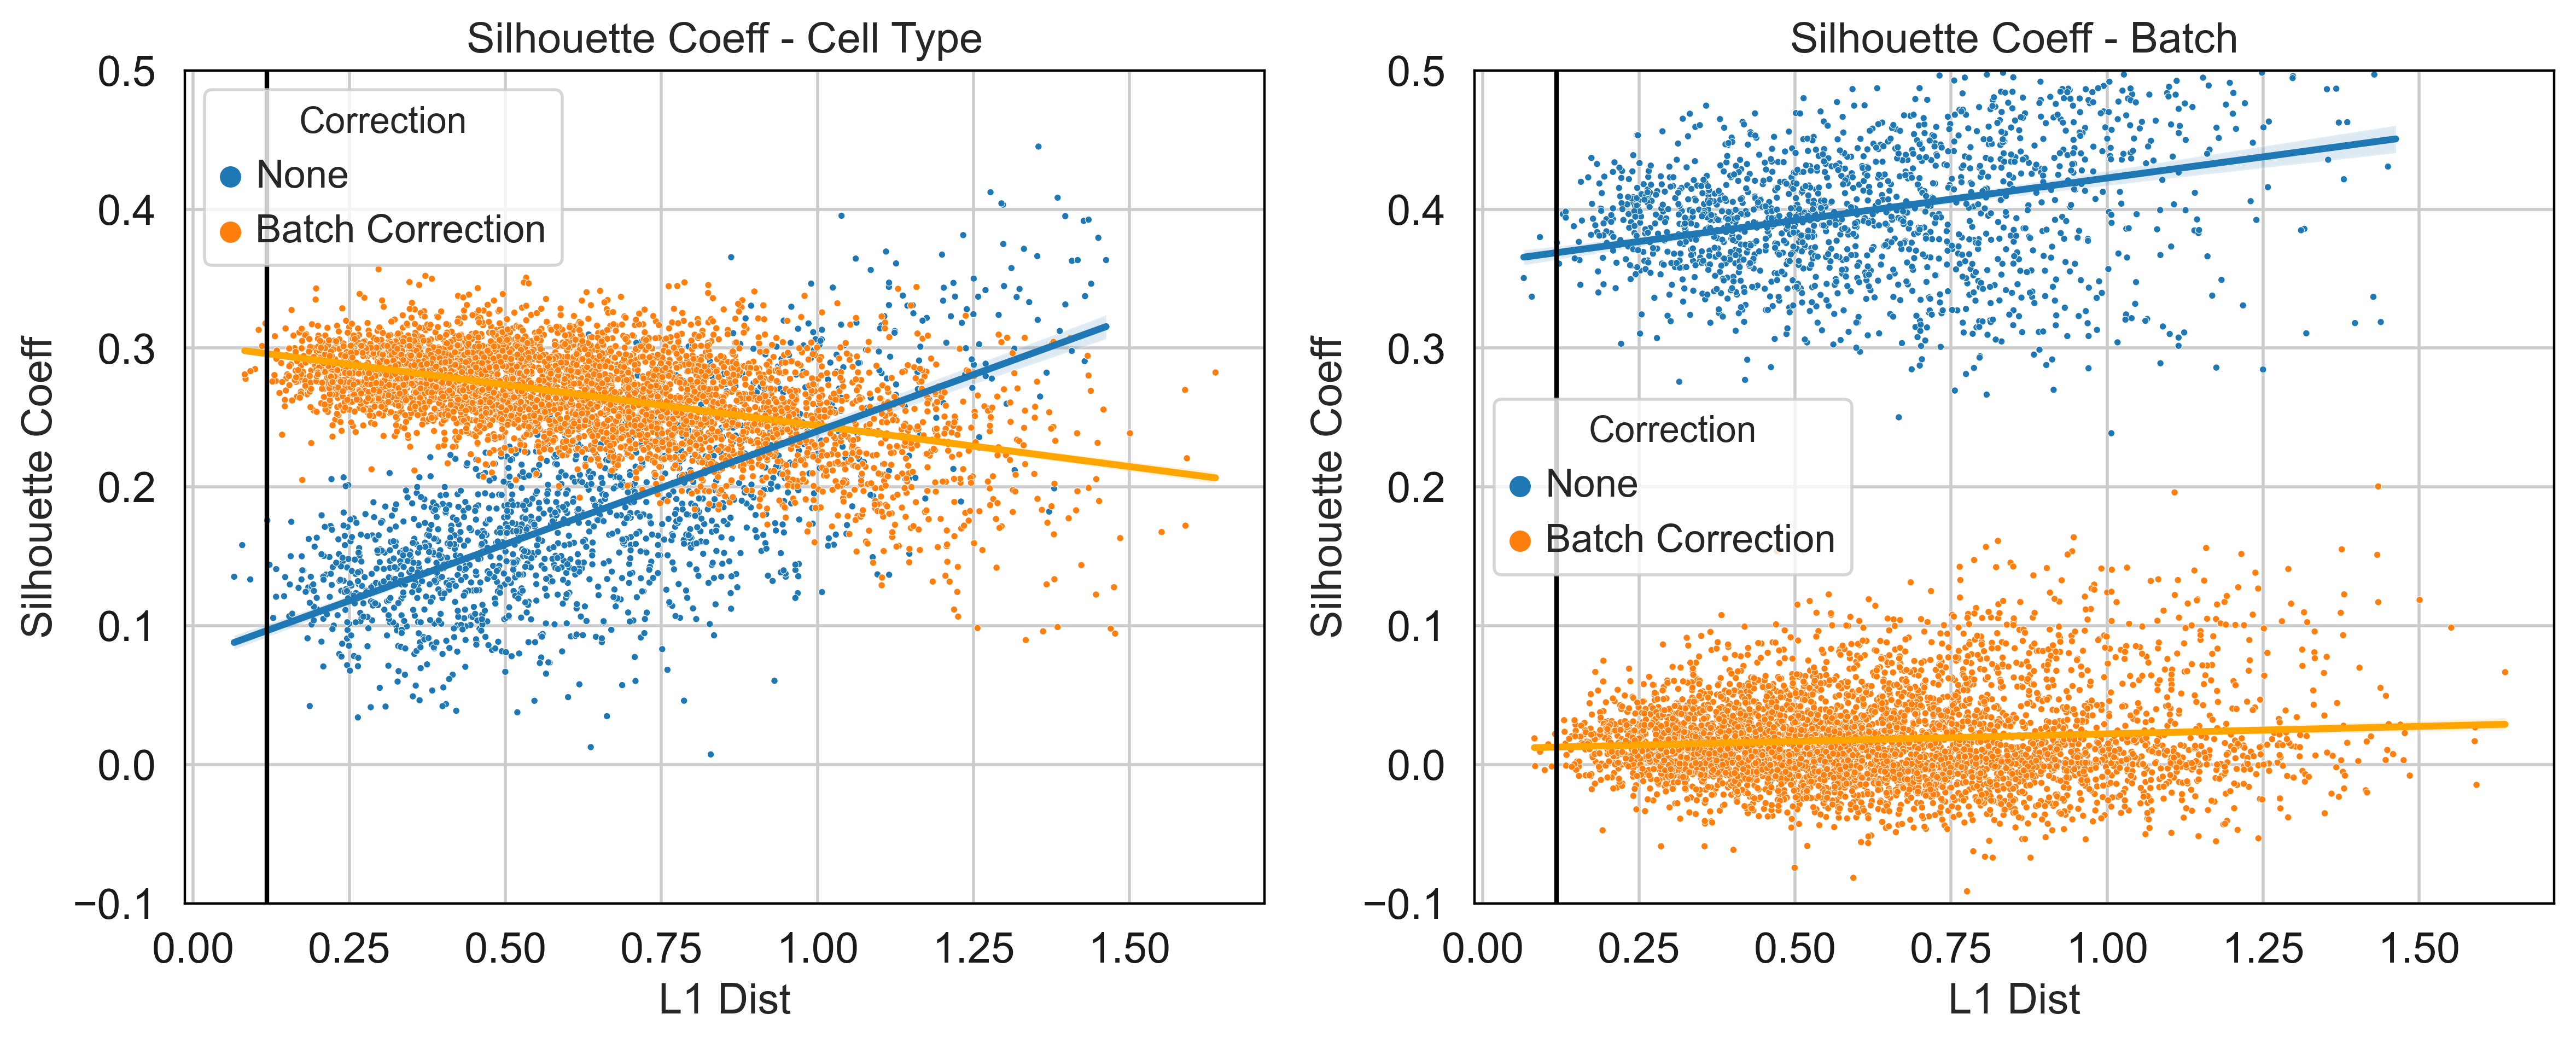

In [468]:
import seaborn as sns
import matplotlib

import scanpy as sc
sc.settings.verbosity = 3
sc.logging.print_header()
sc.settings.set_figure_params(dpi=200,facecolor='white')
# matplotlib.rc_file_defaults()
# sns.set(font_scale=1.)

fig,ax = plt.subplots(1,2,figsize=(12,5))


adata = sc.read("PBMC.h5ad")
probs = dict()
for bt in set(adata.obs["sample"]):
    sub = adata[adata.obs["sample"]==bt]
    prob = []
    for ct in cts:
        prob.append(len(sub[sub.obs["celltype"]==ct]))
    probs[bt] = prob
probs["control"] = numpy.array(probs["control"])
probs["stimul"] = numpy.array(probs["stimul"])
probs["control"] = probs["control"] / probs["control"].sum()
probs["stimul"] = probs["stimul"] / probs["stimul"].sum()
dist = numpy.linalg.norm((probs["stimul"] - probs["control"]), ord=1)

sdff = sdf[sdf["Correction"] == "Batch Correction"]
sns.regplot(data=sdff,x="l1dist",y="score_ct",ax=ax[0],scatter_kws={"s":1},color='#FFA500')
sns.regplot(data=sdff,x="l1dist",y="score_bt",ax=ax[1],scatter_kws={"s":1},color="#FFA500")



sdff = sdf[sdf["Correction"] == "None"]
sns.regplot(data=sdff,x="l1dist",y="score_ct",ax=ax[0],scatter_kws={"s":1})
sns.regplot(data=sdff,x="l1dist",y="score_bt",ax=ax[1],scatter_kws={"s":1})

sns.scatterplot(data=sdf,x="l1dist",y="score_ct",ax=ax[0],hue="Correction",s=5)
sns.scatterplot(data=sdf,x="l1dist",y="score_bt",ax=ax[1],hue="Correction",s=5)

ax[0].vlines(x=dist, ymin=-0.1, ymax= 0.5,color = "#000000")
ax[1].vlines(x=dist, ymin=-0.1, ymax= 0.5, color="#000000")
ax[0].set_ylim(-0.1,0.5)
ax[1].set_ylim(-0.1,0.5)

ax[0].set_title("Silhouette Coeff - Cell Type")
ax[1].set_title("Silhouette Coeff - Batch")
ax[0].set_ylabel("Silhouette Coeff")
ax[1].set_ylabel("Silhouette Coeff")
ax[0].set_xlabel("L1 Dist")
ax[1].set_xlabel("L1 Dist")
fig.tight_layout()
fig.savefig("/Users/ceglian/batch.pdf")


In [8]:
import scib




# Build Cell Embedding

normalizing counts per cell
    finished (0:00:00)
Loading Expression.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14039/14039 [00:03<00:00, 3849.94it/s]


computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:02)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:08)


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:379: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:379: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
 

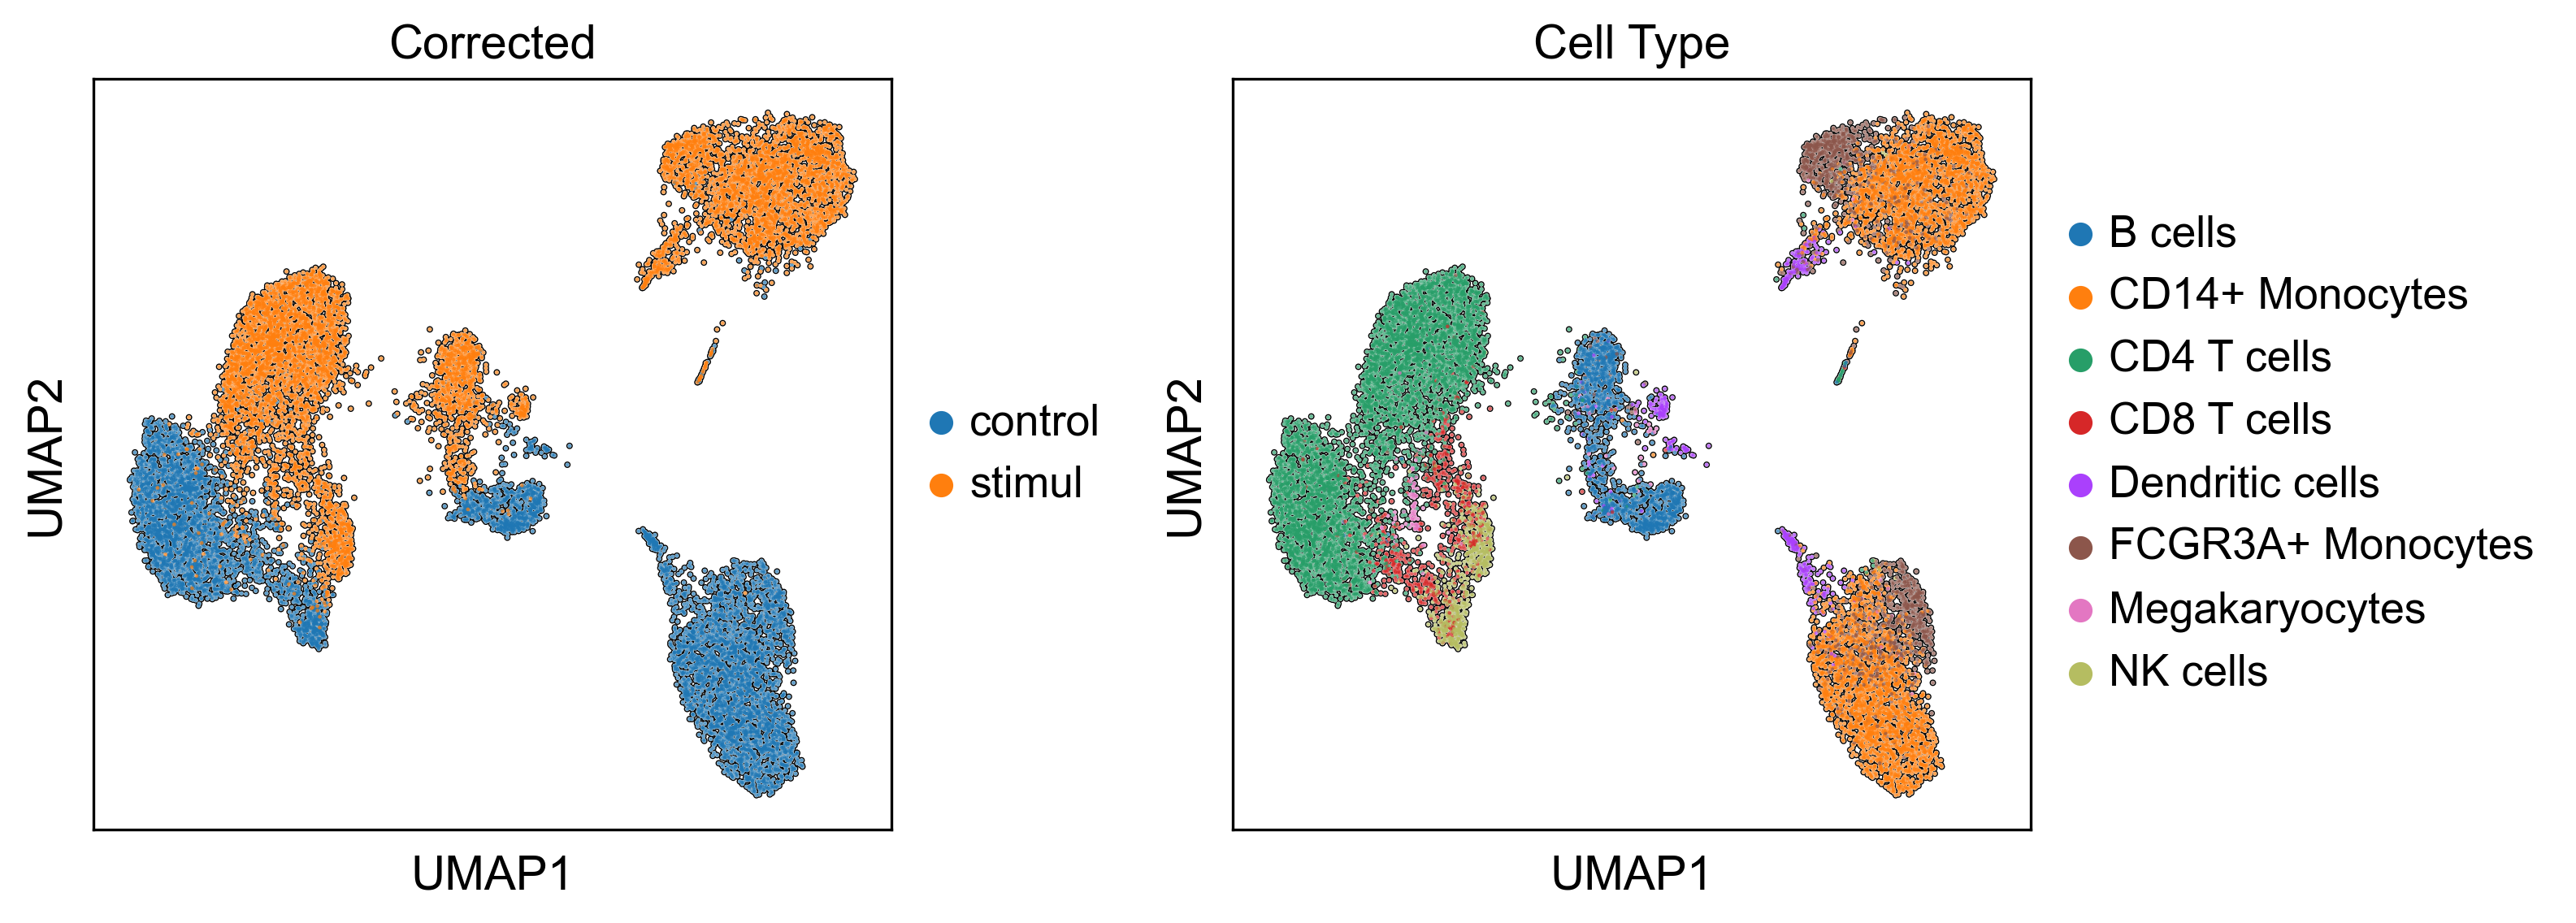

In [49]:
cembed = CellEmbedding(dataset, embed)
adata = cembed.get_adata()
sc.pl.umap(adata,color=["sample","celltype"], wspace=0.3,
                 title=["Corrected","Cell Type"],add_outline=True,size=5)

# Apply Batch Correction

Generating batch vectors.
Computing correction vector for stimul.
Applying correction vectors.
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:02)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:08)


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:379: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:379: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
 

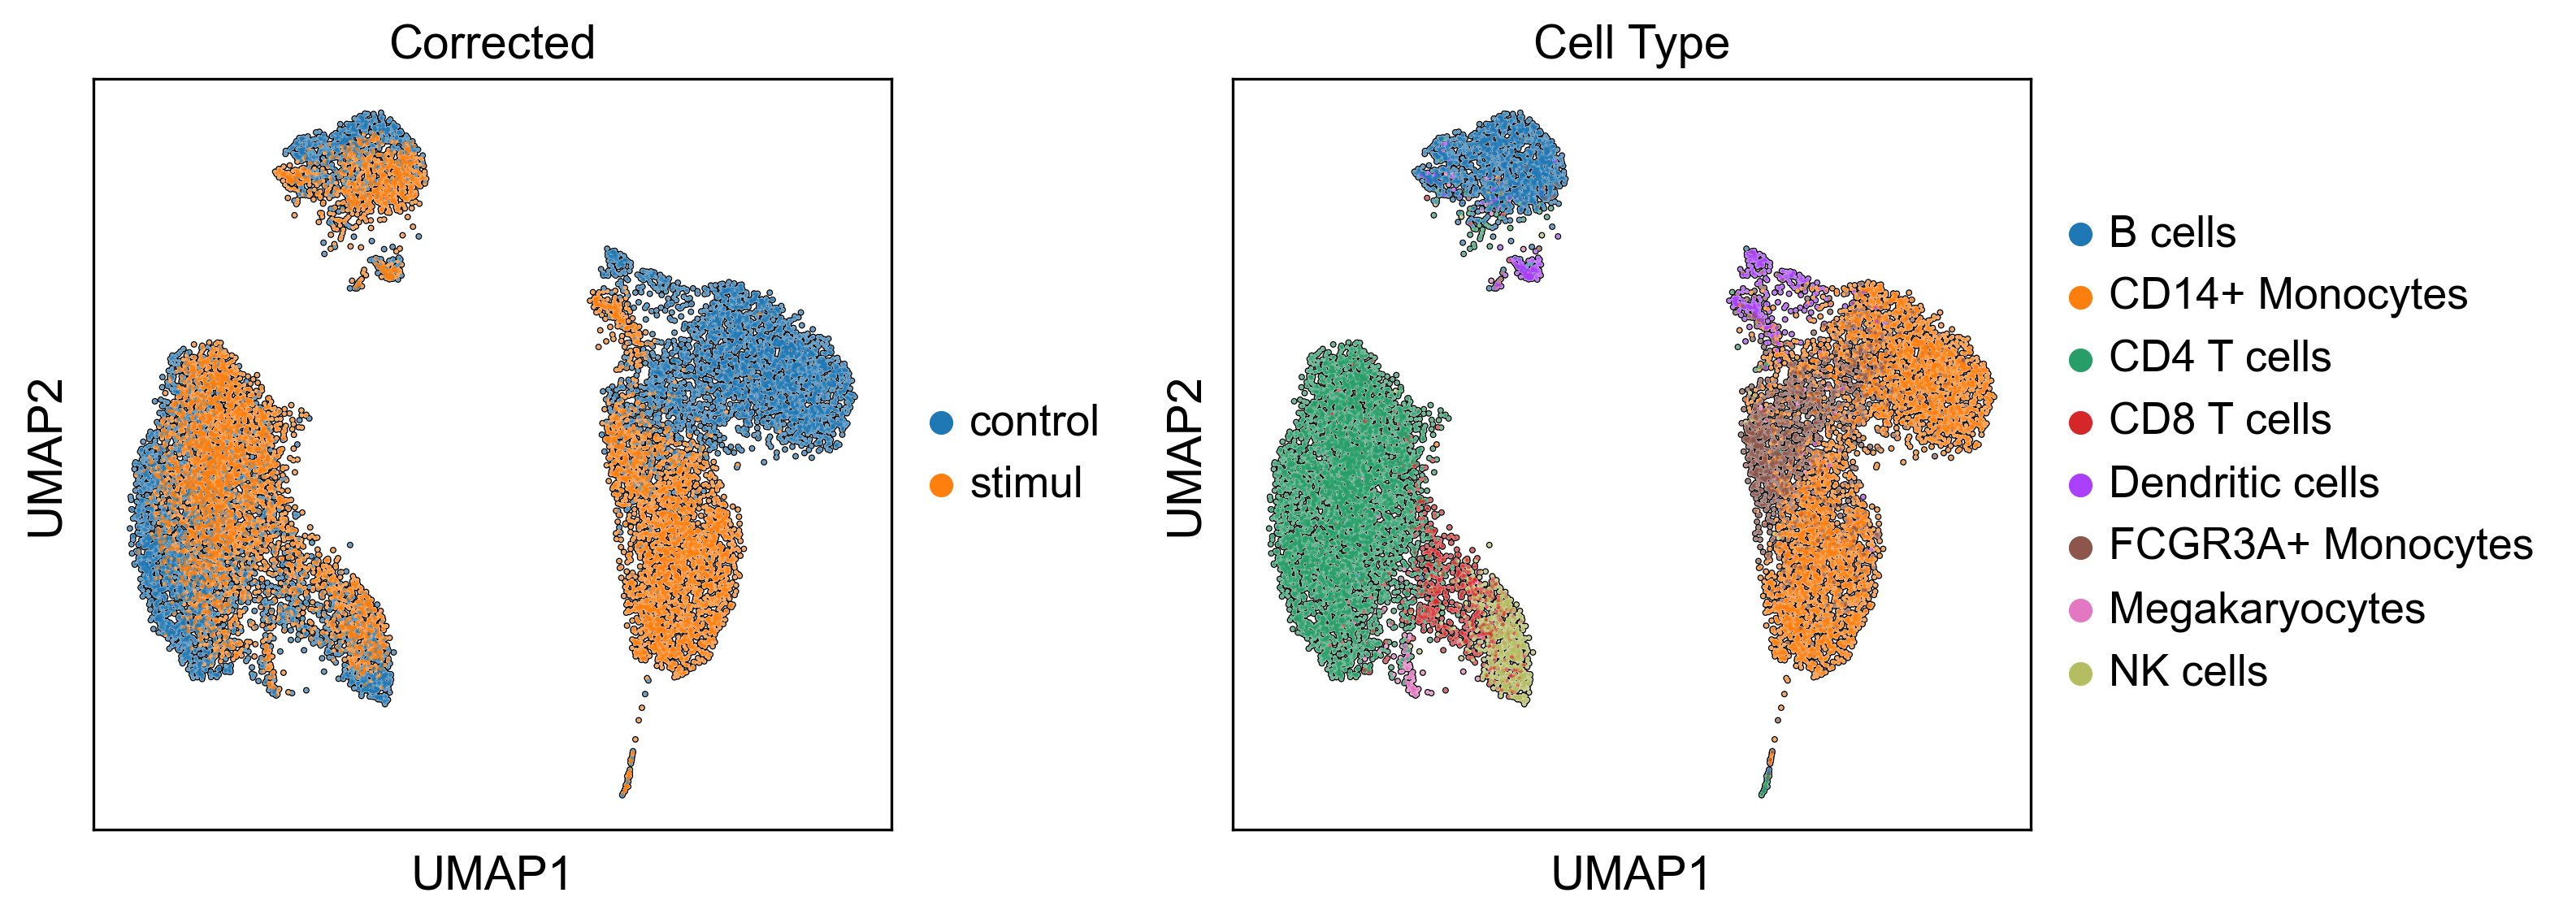

In [50]:
cembed.batch_correct(column="sample",reference="control")
adata = cembed.get_adata()
sc.pl.umap(adata,color=["sample","celltype"], wspace=0.3,
                                 title=["Corrected","Cell Type"],add_outline=True,size=5, save="pbmc.pdf")



# Generate Metagenes

In [51]:
gdata = embed.get_adata(resolution=10)
metagenes = embed.get_metagenes(gdata)

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
running Leiden clustering
    finished: found 116 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:01)


# Find ISG Metagene

In [52]:
for mg, genes in metagenes.items():
    if "IFIT3" in genes:
        print(mg, genes)
        isg_metagene = mg

2 ['ISG15', 'ZFYVE9', 'RP11-421L21.2', 'IL24', 'ZNF80', 'TNFSF10', 'CXCL10', 'LINC00893', 'TKTL1', 'ESCO2', 'LY6E', 'ERMP1', 'RP11-318E3.9', 'IFIT2', 'IFIT3', 'IFIT1', 'IFITM3', 'PGAM5', 'SERPINA9', 'ISG20', 'CLUH', 'FAM83D', 'ZNF382', 'MX1']


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


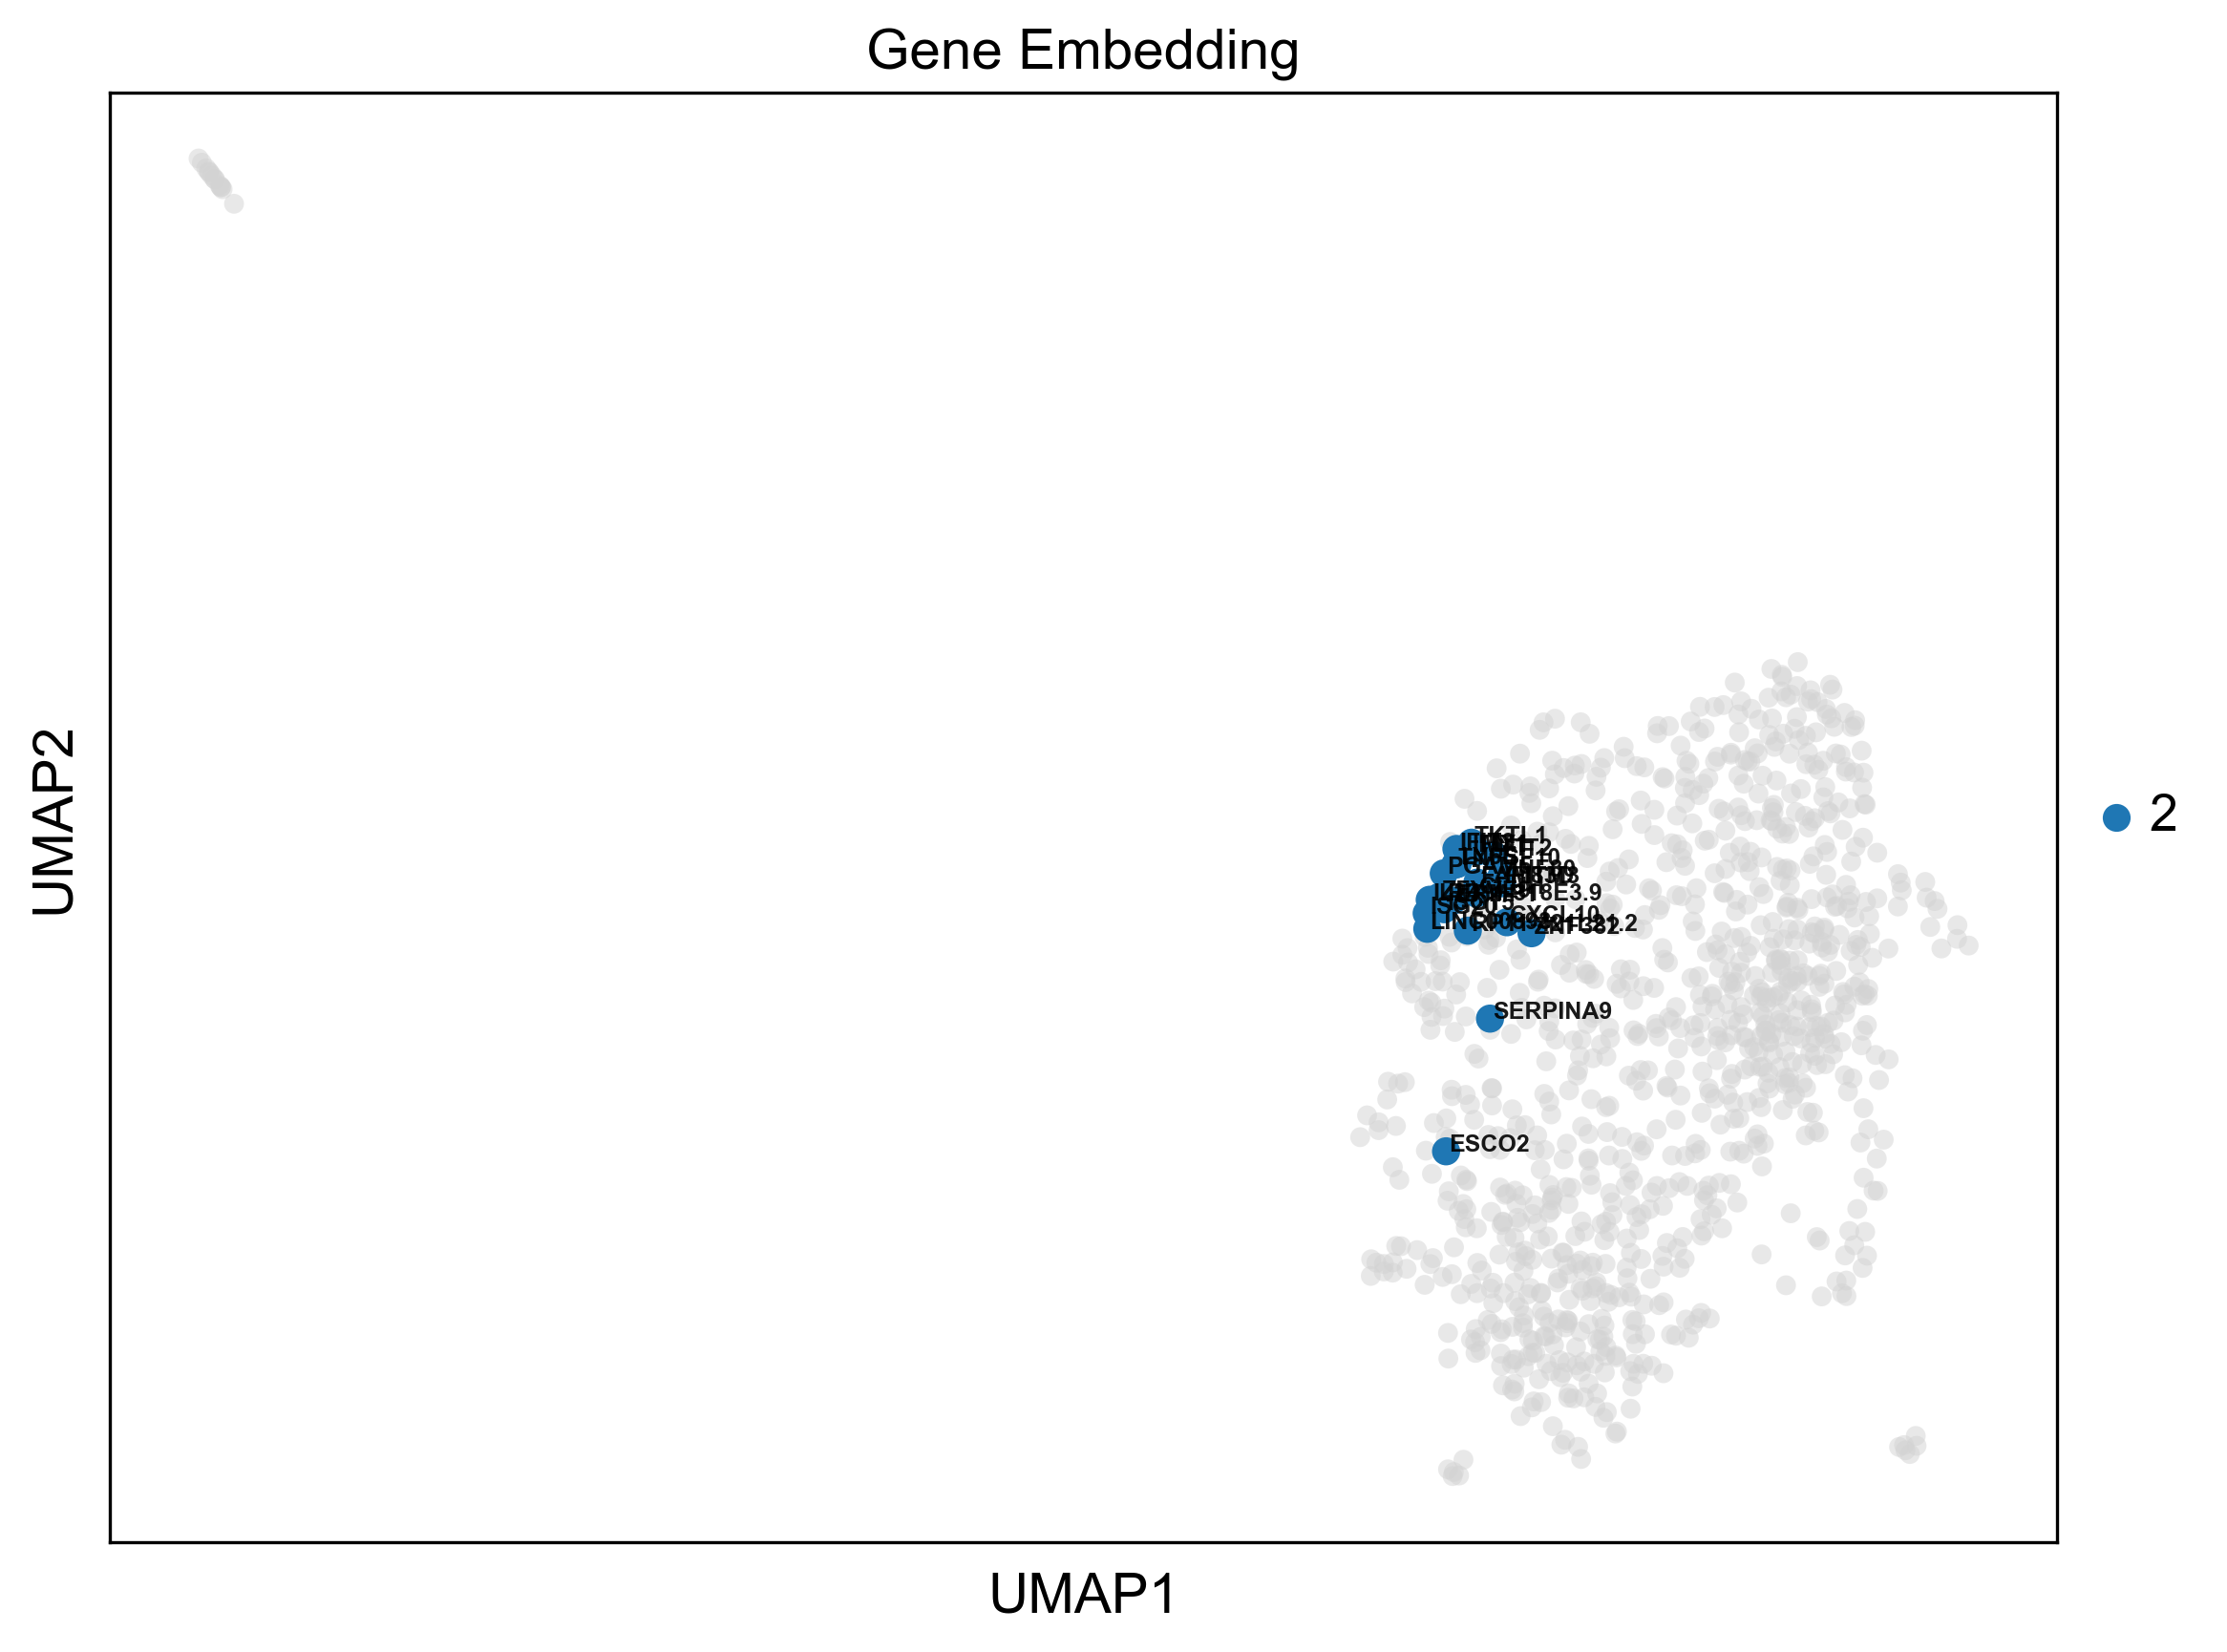

In [53]:
embed.plot_metagene(gdata, mg=isg_metagene)

In [54]:
# sc.pp.normalize_total(adata)
# sc.pp.log1p(adata)
embed.score_metagenes(adata, metagenes)

computing score '48_SCORE'
    finished: added
    '48_SCORE', score of gene set (adata.obs).
    285 total control genes are used. (0:00:00)
computing score '2_SCORE'
    finished: added
    '2_SCORE', score of gene set (adata.obs).
    262 total control genes are used. (0:00:00)
computing score '6_SCORE'
    finished: added
    '6_SCORE', score of gene set (adata.obs).
    228 total control genes are used. (0:00:00)
computing score '57_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '57_SCORE', score of gene set (adata.obs).
    203 total control genes are used. (0:00:00)
computing score '13_SCORE'
    finished: added
    '13_SCORE', score of gene set (adata.obs).
    356 total control genes are used. (0:00:00)
computing score '35_SCORE'
    finished: added
    '35_SCORE', score of gene set (adata.obs).
    241 total control genes are used. (0:00:00)
computing score '47_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '47_SCORE', score of gene set (adata.obs).
    201 total control genes are used. (0:00:00)
computing score '18_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '18_SCORE', score of gene set (adata.obs).
    406 total control genes are used. (0:00:00)
computing score '41_SCORE'
    finished: added
    '41_SCORE', score of gene set (adata.obs).
    284 total control genes are used. (0:00:00)
computing score '4_SCORE'
    finished: added
    '4_SCORE', score of gene set (adata.obs).
    150 total control genes are used. (0:00:00)
computing score '59_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '59_SCORE', score of gene set (adata.obs).
    245 total control genes are used. (0:00:00)
computing score '69_SCORE'
    finished: added
    '69_SCORE', score of gene set (adata.obs).
    120 total control genes are used. (0:00:00)
computing score '49_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '49_SCORE', score of gene set (adata.obs).
    244 total control genes are used. (0:00:00)
computing score '55_SCORE'
    finished: added
    '55_SCORE', score of gene set (adata.obs).
    202 total control genes are used. (0:00:00)
computing score '61_SCORE'
    finished: added
    '61_SCORE', score of gene set (adata.obs).
    161 total control genes are used. (0:00:00)
computing score '114_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '114_SCORE', score of gene set (adata.obs).
    82 total control genes are used. (0:00:00)
computing score '96_SCORE'
    finished: added
    '96_SCORE', score of gene set (adata.obs).
    79 total control genes are used. (0:00:00)
computing score '93_SCORE'
    finished: added
    '93_SCORE', score of gene set (adata.obs).
    164 total control genes are used. (0:00:00)
computing score '29_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '29_SCORE', score of gene set (adata.obs).
    324 total control genes are used. (0:00:00)
computing score '40_SCORE'
    finished: added
    '40_SCORE', score of gene set (adata.obs).
    242 total control genes are used. (0:00:00)
computing score '36_SCORE'
    finished: added
    '36_SCORE', score of gene set (adata.obs).
    283 total control genes are used. (0:00:00)
computing score '74_SCORE'
    finished: added
    '74_SCORE', score of gene set (adata.obs).
    246 total control genes are used. (0:00:00)
computing score '104_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '104_SCORE', score of gene set (adata.obs).
    80 total control genes are used. (0:00:00)
computing score '44_SCORE'
    finished: added
    '44_SCORE', score of gene set (adata.obs).
    284 total control genes are used. (0:00:00)
computing score '92_SCORE'
    finished: added
    '92_SCORE', score of gene set (adata.obs).
    122 total control genes are used. (0:00:00)
computing score '12_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '12_SCORE', score of gene set (adata.obs).
    278 total control genes are used. (0:00:00)
computing score '22_SCORE'
    finished: added
    '22_SCORE', score of gene set (adata.obs).
    322 total control genes are used. (0:00:00)
computing score '34_SCORE'
    finished: added
    '34_SCORE', score of gene set (adata.obs).
    283 total control genes are used. (0:00:00)
computing score '27_SCORE'
    finished: added
    '27_SCORE', score of gene set (adata.obs).
    113 total control genes are used. (0:00:00)
computing score '50_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '50_SCORE', score of gene set (adata.obs).
    286 total control genes are used. (0:00:00)
computing score '9_SCORE'
    finished: added
    '9_SCORE', score of gene set (adata.obs).
    272 total control genes are used. (0:00:00)
computing score '8_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '8_SCORE', score of gene set (adata.obs).
    194 total control genes are used. (0:00:00)
computing score '72_SCORE'
    finished: added
    '72_SCORE', score of gene set (adata.obs).
    204 total control genes are used. (0:00:00)
computing score '11_SCORE'
    finished: added
    '11_SCORE', score of gene set (adata.obs).
    321 total control genes are used. (0:00:00)


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


computing score '14_SCORE'
    finished: added
    '14_SCORE', score of gene set (adata.obs).
    315 total control genes are used. (0:00:00)
computing score '66_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '66_SCORE', score of gene set (adata.obs).
    246 total control genes are used. (0:00:00)
computing score '71_SCORE'
    finished: added
    '71_SCORE', score of gene set (adata.obs).
    246 total control genes are used. (0:00:00)
computing score '10_SCORE'
    finished: added
    '10_SCORE', score of gene set (adata.obs).
    238 total control genes are used. (0:00:00)
computing score '68_SCORE'
    finished: added
    '68_SCORE', score of gene set (adata.obs).
    162 total control genes are used. (0:00:00)
computing score '70_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '70_SCORE', score of gene set (adata.obs).
    162 total control genes are used. (0:00:00)
computing score '28_SCORE'
    finished: added
    '28_SCORE', score of gene set (adata.obs).
    282 total control genes are used. (0:00:00)
computing score '90_SCORE'
    finished: added
    '90_SCORE', score of gene set (adata.obs).
    78 total control genes are used. (0:00:00)
computing score '98_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '98_SCORE', score of gene set (adata.obs).
    122 total control genes are used. (0:00:00)
computing score '26_SCORE'
    finished: added
    '26_SCORE', score of gene set (adata.obs).
    70 total control genes are used. (0:00:00)
computing score '52_SCORE'
    finished: added
    '52_SCORE', score of gene set (adata.obs).
    286 total control genes are used. (0:00:00)
computing score '32_SCORE'
    finished: added
    '32_SCORE', score of gene set (adata.obs).
    325 total control genes are used. (0:00:00)
computing score '0_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '0_SCORE', score of gene set (adata.obs).
    260 total control genes are used. (0:00:00)
computing score '46_SCORE'
    finished: added
    '46_SCORE', score of gene set (adata.obs).
    285 total control genes are used. (0:00:00)
computing score '51_SCORE'
    finished: added
    '51_SCORE', score of gene set (adata.obs).
    244 total control genes are used. (0:00:00)
computing score '94_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '94_SCORE', score of gene set (adata.obs).
    164 total control genes are used. (0:00:00)
computing score '60_SCORE'
    finished: added
    '60_SCORE', score of gene set (adata.obs).
    203 total control genes are used. (0:00:00)
computing score '102_SCORE'
    finished: added
    '102_SCORE', score of gene set (adata.obs).
    163 total control genes are used. (0:00:00)
computing score '76_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '76_SCORE', score of gene set (adata.obs).
    163 total control genes are used. (0:00:00)
computing score '15_SCORE'
    finished: added
    '15_SCORE', score of gene set (adata.obs).
    322 total control genes are used. (0:00:00)
computing score '19_SCORE'
    finished: added
    '19_SCORE', score of gene set (adata.obs).
    322 total control genes are used. (0:00:00)
computing score '73_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '73_SCORE', score of gene set (adata.obs).
    204 total control genes are used. (0:00:00)
computing score '5_SCORE'
    finished: added
    '5_SCORE', score of gene set (adata.obs).
    480 total control genes are used. (0:00:00)
computing score '97_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '97_SCORE', score of gene set (adata.obs).
    164 total control genes are used. (0:00:00)
computing score '84_SCORE'
    finished: added
    '84_SCORE', score of gene set (adata.obs).
    163 total control genes are used. (0:00:00)
computing score '16_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '16_SCORE', score of gene set (adata.obs).
    239 total control genes are used. (0:00:00)
computing score '24_SCORE'
    finished: added
    '24_SCORE', score of gene set (adata.obs).
    190 total control genes are used. (0:00:00)
computing score '45_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '45_SCORE', score of gene set (adata.obs).
    320 total control genes are used. (0:00:00)
computing score '1_SCORE'
    finished: added
    '1_SCORE', score of gene set (adata.obs).
    479 total control genes are used. (0:00:00)
computing score '3_SCORE'
    finished: added
    '3_SCORE', score of gene set (adata.obs).
    142 total control genes are used. (0:00:00)
computing score '109_SCORE'
    finished: added
    '109_SCORE', score of gene set (adata.obs).
    123 total control genes are used. (0:00:00)
computing score '99_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '99_SCORE', score of gene set (adata.obs).
    80 total control genes are used. (0:00:00)
computing score '80_SCORE'
    finished: added
    '80_SCORE', score of gene set (adata.obs).
    163 total control genes are used. (0:00:00)
computing score '20_SCORE'
    finished: added
    '20_SCORE', score of gene set (adata.obs).
    283 total control genes are used. (0:00:00)
computing score '78_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '78_SCORE', score of gene set (adata.obs).
    163 total control genes are used. (0:00:00)
computing score '81_SCORE'
    finished: added
    '81_SCORE', score of gene set (adata.obs).
    164 total control genes are used. (0:00:00)
computing score '91_SCORE'
    finished: added
    '91_SCORE', score of gene set (adata.obs).
    204 total control genes are used. (0:00:00)
computing score '25_SCORE'
    finished: added
    '25_SCORE', score of gene set (adata.obs).
    322 total control genes are used. (0:00:00)
computing score '42_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '42_SCORE', score of gene set (adata.obs).
    368 total control genes are used. (0:00:00)
computing score '89_SCORE'
    finished: added
    '89_SCORE', score of gene set (adata.obs).
    120 total control genes are used. (0:00:00)
computing score '23_SCORE'
    finished: added
    '23_SCORE', score of gene set (adata.obs).
    322 total control genes are used. (0:00:00)
computing score '53_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '53_SCORE', score of gene set (adata.obs).
    245 total control genes are used. (0:00:00)
computing score '103_SCORE'
    finished: added
    '103_SCORE', score of gene set (adata.obs).
    39 total control genes are used. (0:00:00)
computing score '82_SCORE'
    finished: added
    '82_SCORE', score of gene set (adata.obs).
    121 total control genes are used. (0:00:00)
computing score '43_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '43_SCORE', score of gene set (adata.obs).
    242 total control genes are used. (0:00:00)
computing score '95_SCORE'
    finished: added
    '95_SCORE', score of gene set (adata.obs).
    122 total control genes are used. (0:00:00)
computing score '31_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '31_SCORE', score of gene set (adata.obs).
    409 total control genes are used. (0:00:00)
computing score '100_SCORE'
    finished: added
    '100_SCORE', score of gene set (adata.obs).
    122 total control genes are used. (0:00:00)
computing score '58_SCORE'
    finished: added
    '58_SCORE', score of gene set (adata.obs).
    203 total control genes are used. (0:00:00)
computing score '17_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '17_SCORE', score of gene set (adata.obs).
    364 total control genes are used. (0:00:00)
computing score '64_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '64_SCORE', score of gene set (adata.obs).
    246 total control genes are used. (0:00:00)
computing score '79_SCORE'
    finished: added
    '79_SCORE', score of gene set (adata.obs).
    163 total control genes are used. (0:00:00)
computing score '101_SCORE'
    finished: added
    '101_SCORE', score of gene set (adata.obs).
    121 total control genes are used. (0:00:00)
computing score '56_SCORE'
    finished: added
    '56_SCORE', score of gene set (adata.obs).
    245 total control genes are used. (0:00:00)
computing score '108_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '108_SCORE', score of gene set (adata.obs).
    81 total control genes are used. (0:00:00)
computing score '21_SCORE'
    finished: added
    '21_SCORE', score of gene set (adata.obs).
    323 total control genes are used. (0:00:00)
computing score '77_SCORE'
    finished: added
    '77_SCORE', score of gene set (adata.obs).
    163 total control genes are used. (0:00:00)
computing score '63_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '63_SCORE', score of gene set (adata.obs).
    204 total control genes are used. (0:00:00)
computing score '62_SCORE'
    finished: added
    '62_SCORE', score of gene set (adata.obs).
    245 total control genes are used. (0:00:00)
computing score '85_SCORE'
    finished: added
    '85_SCORE', score of gene set (adata.obs).
    121 total control genes are used. (0:00:00)
computing score '39_SCORE'
    finished: added
    '39_SCORE', score of gene set (adata.obs).
    326 total control genes are used. (0:00:00)
computing score '65_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '65_SCORE', score of gene set (adata.obs).
    204 total control genes are used. (0:00:00)
computing score '75_SCORE'
    finished: added
    '75_SCORE', score of gene set (adata.obs).
    77 total control genes are used. (0:00:00)
computing score '37_SCORE'
    finished: added
    '37_SCORE', score of gene set (adata.obs).
    284 total control genes are used. (0:00:00)
computing score '30_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '30_SCORE', score of gene set (adata.obs).
    317 total control genes are used. (0:00:00)
computing score '113_SCORE'
    finished: added
    '113_SCORE', score of gene set (adata.obs).
    82 total control genes are used. (0:00:00)
computing score '88_SCORE'
    finished: added
    '88_SCORE', score of gene set (adata.obs).
    204 total control genes are used. (0:00:00)
computing score '54_SCORE'
    finished: added
    '54_SCORE', score of gene set (adata.obs).
    246 total control genes are used. (0:00:00)
computing score '86_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceW

    finished: added
    '86_SCORE', score of gene set (adata.obs).
    121 total control genes are used. (0:00:00)
computing score '7_SCORE'
    finished: added
    '7_SCORE', score of gene set (adata.obs).
    277 total control genes are used. (0:00:00)
computing score '38_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceW

    finished: added
    '38_SCORE', score of gene set (adata.obs).
    327 total control genes are used. (0:00:00)
computing score '105_SCORE'
    finished: added
    '105_SCORE', score of gene set (adata.obs).
    123 total control genes are used. (0:00:00)
computing score '67_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceW

    finished: added
    '67_SCORE', score of gene set (adata.obs).
    162 total control genes are used. (0:00:00)
computing score '87_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '87_SCORE', score of gene set (adata.obs).
    205 total control genes are used. (0:00:00)
computing score '33_SCORE'
    finished: added
    '33_SCORE', score of gene set (adata.obs).
    199 total control genes are used. (0:00:00)
computing score '106_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

    finished: added
    '106_SCORE', score of gene set (adata.obs).
    123 total control genes are used. (0:00:00)
computing score '83_SCORE'
    finished: added
    '83_SCORE', score of gene set (adata.obs).
    163 total control genes are used. (0:00:00)
computing score '107_SCORE'
    finished: added
    '107_SCORE', score of gene set (adata.obs).
    123 total control genes are used. (0:00:00)
computing score '111_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceW

    finished: added
    '111_SCORE', score of gene set (adata.obs).
    82 total control genes are used. (0:00:00)
computing score '110_SCORE'
    finished: added
    '110_SCORE', score of gene set (adata.obs).
    123 total control genes are used. (0:00:00)
computing score '112_SCORE'
    finished: added
    '112_SCORE', score of gene set (adata.obs).
    81 total control genes are used. (0:00:00)
computing score '115_SCORE'
    finished: added
    '115_SCORE', score of gene set (adata.obs).
    41 total control genes are used. (0:00:00)


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceW

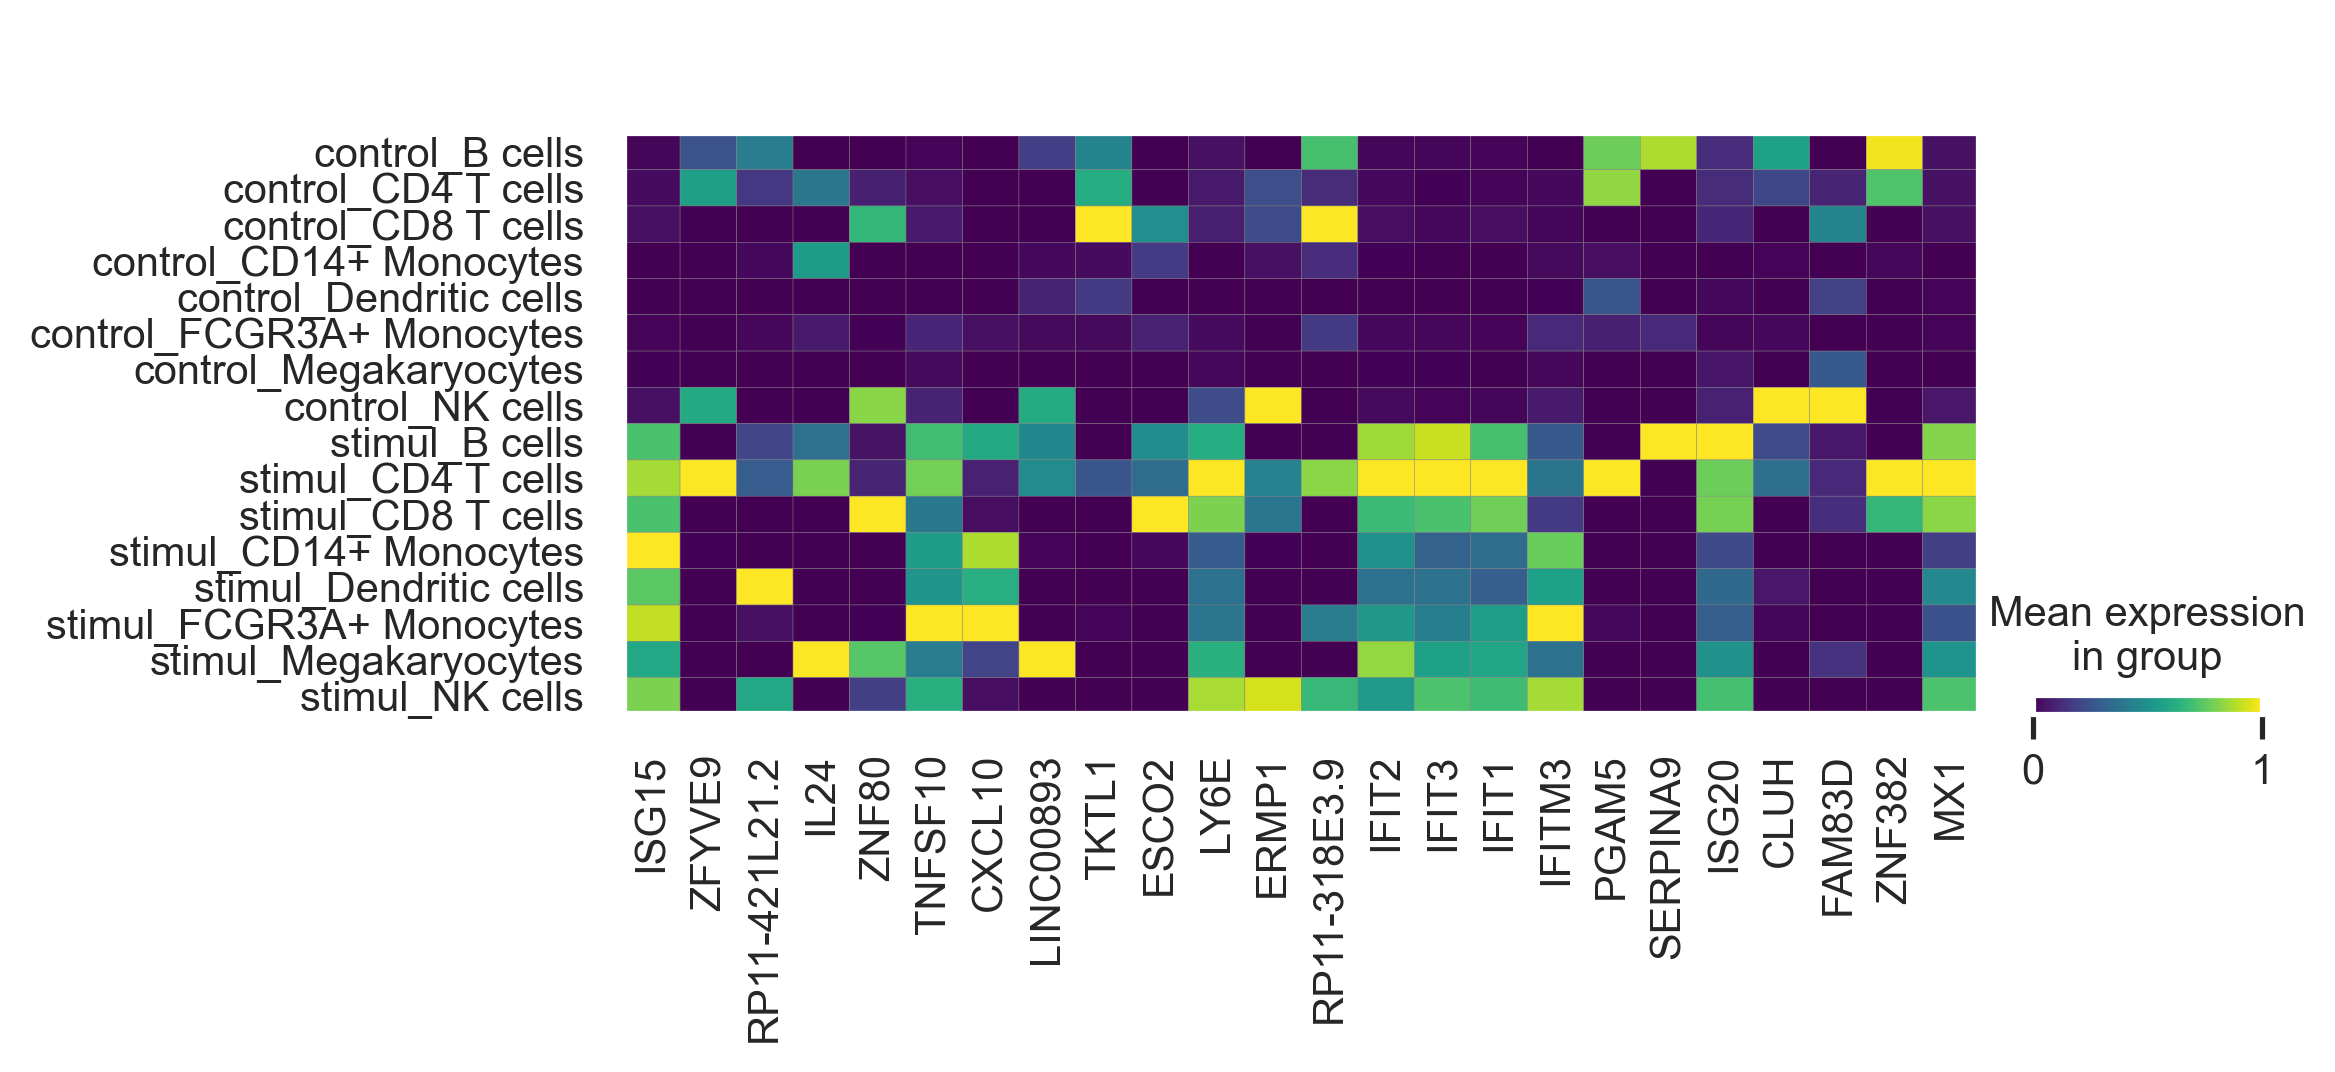

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1.)
fig,ax = plt.subplots(1,1,figsize=(7,3))
sc.pl.matrixplot(adata,metagenes[isg_metagene],groupby="detailed_celltype",standard_scale="var",ax=ax)

In [69]:
import numpy
hla_clusters = dict()
hla2_clusters = dict()
import collections
for i in numpy.linspace(10,200,100):
    gdata = embed.get_adata(resolution=i)
    metagenes = embed.get_metagenes(gdata)
    for mg, genes in metagenes.items():
        if "IFIT1" in genes:
            print(", " .join(genes))
            hla_clusters[int(i)] = genes

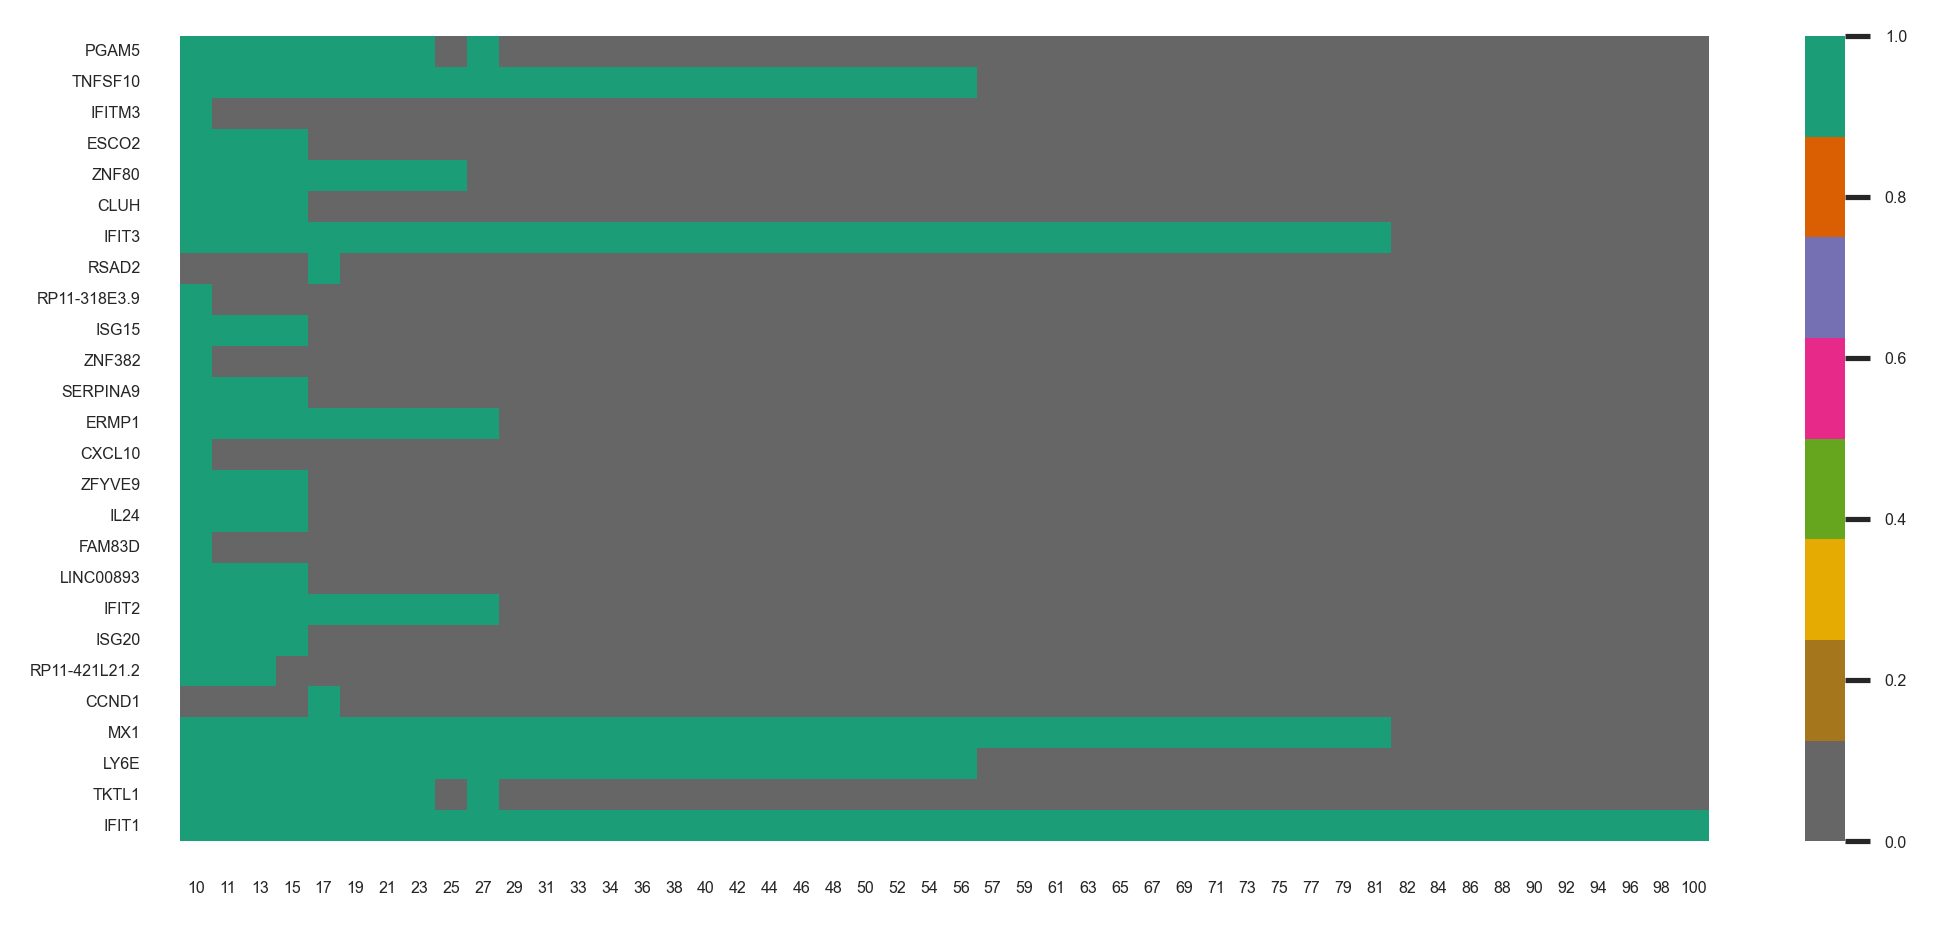

In [60]:
resolutions = []
matrix = []
all_genes = []
for res, hla_genes in hla_clusters.items():
    all_genes+=hla_genes
all_genes = list(set(all_genes))


import pandas
for res, hla_genes in hla_clusters.items():
    row = []
    for g in all_genes:
        if g in hla_genes:
            row.append(1)
        else:
            row.append(0)
    matrix.append(row)
    resolutions.append(int(res))
df = pandas.DataFrame(data=numpy.array(matrix),columns=all_genes,index=resolutions,)
df = df.T
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,1,figsize=(7,3))
sns.heatmap(df,cmap="Dark2_r")
plt.tight_layout()
plt.savefig("/Users/ceglian/gv_mgs.pdf")

In [85]:
similarities = dict()
for gene in tqdm.tqdm(embed.genes):
    df = embed.compute_similarities(gene)
    similarities[gene] = dict(zip(df["Gene"],df["Similarity"]))

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:15<00:00, 13.25it/s]


In [79]:
import pickle
pickle.dump(similarities, open("norm_mi.pkl","wb"))

In [62]:
from scipy.stats import pearsonr
import scipy
import pandas
import os

def correlation(gene1,gene2,adata):
    prof1 = adata.X[:,adata.var.index.tolist().index(gene1)]
    prof2 = adata.X[:,adata.var.index.tolist().index(gene2)]
    res = scipy.stats.pearsonr(prof1, prof2)
    if res.pvalue > 0.05:
        return 0.
    return res.statistic

db = pandas.read_csv("references/trrust_rawdata.human.tsv",sep="\t", header=None)
import collections
trrust = collections.defaultdict(dict)
for x,y,z in zip(db[0],db[1],db[2]):
    trrust[x][y] = z
tftarget = collections.defaultdict(set)

url = "https://drive.google.com/uc?id=1pn6NNQsZOwQX3n3Gjemuv_PxU0hD5fjR"
output = 'TF-Target-information.txt'
if not os.path.exists("TF-Target-information.txt"):
    gdown.download(url, output, quiet=False)
df = pandas.read_csv("TF-Target-information.txt",sep="\t")
for tf, target in zip(df["TF"],df["target"]):
    tftarget[tf].add(target)
import tqdm
rsimilarities = dict()
for gene in tqdm.tqdm(embed.genes):
    df = embed.compute_similarities(gene)
    rsimilarities[gene] = dict(zip(df["Gene"],df["Similarity"]))   

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:34<00:00, 10.58it/s]


In [63]:
adata = sc.read("PBMC.h5ad")
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
sc.pp.scale(adata,max_value=10.)

normalizing counts per cell
    finished (0:00:00)


In [65]:
import itertools
tftarget = collections.defaultdict(set)
df = pandas.read_csv("TF-Target-information.txt",sep="\t")
for tf, target in zip(df["TF"],df["target"]):
    tftarget[tf].add(target)
    
mis = []
correlations = []
cosinet = []
cosine = []
tf = []
tft = []
tflabel= []
pairs = []
for pair in tqdm.tqdm(list(itertools.combinations(adata.var.index.tolist(),2))):
    co = correlation(pair[0],pair[1],adata)
    correlations.append(co)
    mi = dataset.mi_scores[pair[0]][pair[1]]
    mis.append(mi)
    if pair[0] in trrust and pair[1] in trrust[pair[0]] and trrust[pair[0]][pair[1]] == "Activation":
        tflabel.append("Activator")
    elif pair[0] in trrust and pair[1] in trrust[pair[0]] and trrust[pair[0]][pair[1]] == "Repression":
        tflabel.append("Repressor")
    else:
        tflabel.append("_Other")
    if pair[0] in tftarget and pair[1] in tftarget[pair[0]]:
        tf.append("TF-Target")
    else:
        tf.append("_Other")
    cosine.append(rsimilarities[pair[0].upper()][pair[1].upper()])
    pairs.append("{}-{}".format(pair[0],pair[1]))

mis = [x/1000. for x in mis]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 499500/499500 [02:44<00:00, 3029.70it/s]


In [66]:
df = pandas.DataFrame.from_dict({"Corr":correlations,"MI":mis,"Cosine":cosine,"Regulation":tflabel,"TF":tf,"Pair":pairs})
annotation = []
for x,y in zip(df["Regulation"],df["TF"]):
    if y != "TF-Target":
        annotation.append("Gene Pair")
    elif y == "TF-Target" and x == "_Other":
        annotation.append("TF-Target")
    else:
        annotation.append(x)
df["Annotation"] = annotation
df

Corr        MI    Cosine Regulation      TF           Pair  \
0       0.256662  0.048456  0.068560     _Other  _Other     HES4-ISG15   
1       0.000000  0.633931  0.493532     _Other  _Other  HES4-TNFRSF18   
2       0.000000  0.444057  0.296409     _Other  _Other   HES4-TNFRSF4   
3       0.000000  0.918296  0.362080     _Other  _Other     HES4-PRKCZ   
4      -0.016804  0.000000  0.241946     _Other  _Other   HES4-FAM213B   
...          ...       ...       ...        ...     ...            ...   
499495  0.000000  0.559571  0.217000     _Other  _Other     BACE2-CSTB   
499496  0.000000  0.000000  0.209589     _Other  _Other    BACE2-S100B   
499497 -0.117128  0.079334  0.468298     _Other  _Other       MX1-CSTB   
499498  0.024579  0.752854  0.215871     _Other  _Other      MX1-S100B   
499499  0.000000  0.803353  0.486982     _Other  _Other     CSTB-S100B   

       Annotation  
0       Gene Pair  
1       Gene Pair  
2       Gene Pair  
3       Gene Pair  
4       Gene Pair  
...           ...  
499495  Gene Pair  
499496  Gene Pair  
499497  Gene Pair  
499498  Gene Pair  
499499  Gene Pair  

[499500 rows x 7 columns]

In [68]:
df.to_csv("normalized.csv")

# Plot All Metagenes

In [70]:
import numpy
mgs = dict()
for mg, genes in metagenes.items():
    if len(genes) > 4:
        mgs[mg] = genes

sns.set(font_scale=0.35)

embed.plot_metagenes_scores(adata,mgs,"detailed_celltype")

KeyError: '5_SCORE'

<Figure size 750x1950 with 0 Axes>

# Compute PCA Loadings for Comparison

scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.22.4 scipy==1.9.0 pandas==1.5.1 scikit-learn==1.0.2 statsmodels==0.13.2 python-igraph==0.9.11 pynndescent==0.5.7
normalizing counts per cell
    finished (0:00:00)
computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:01)


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


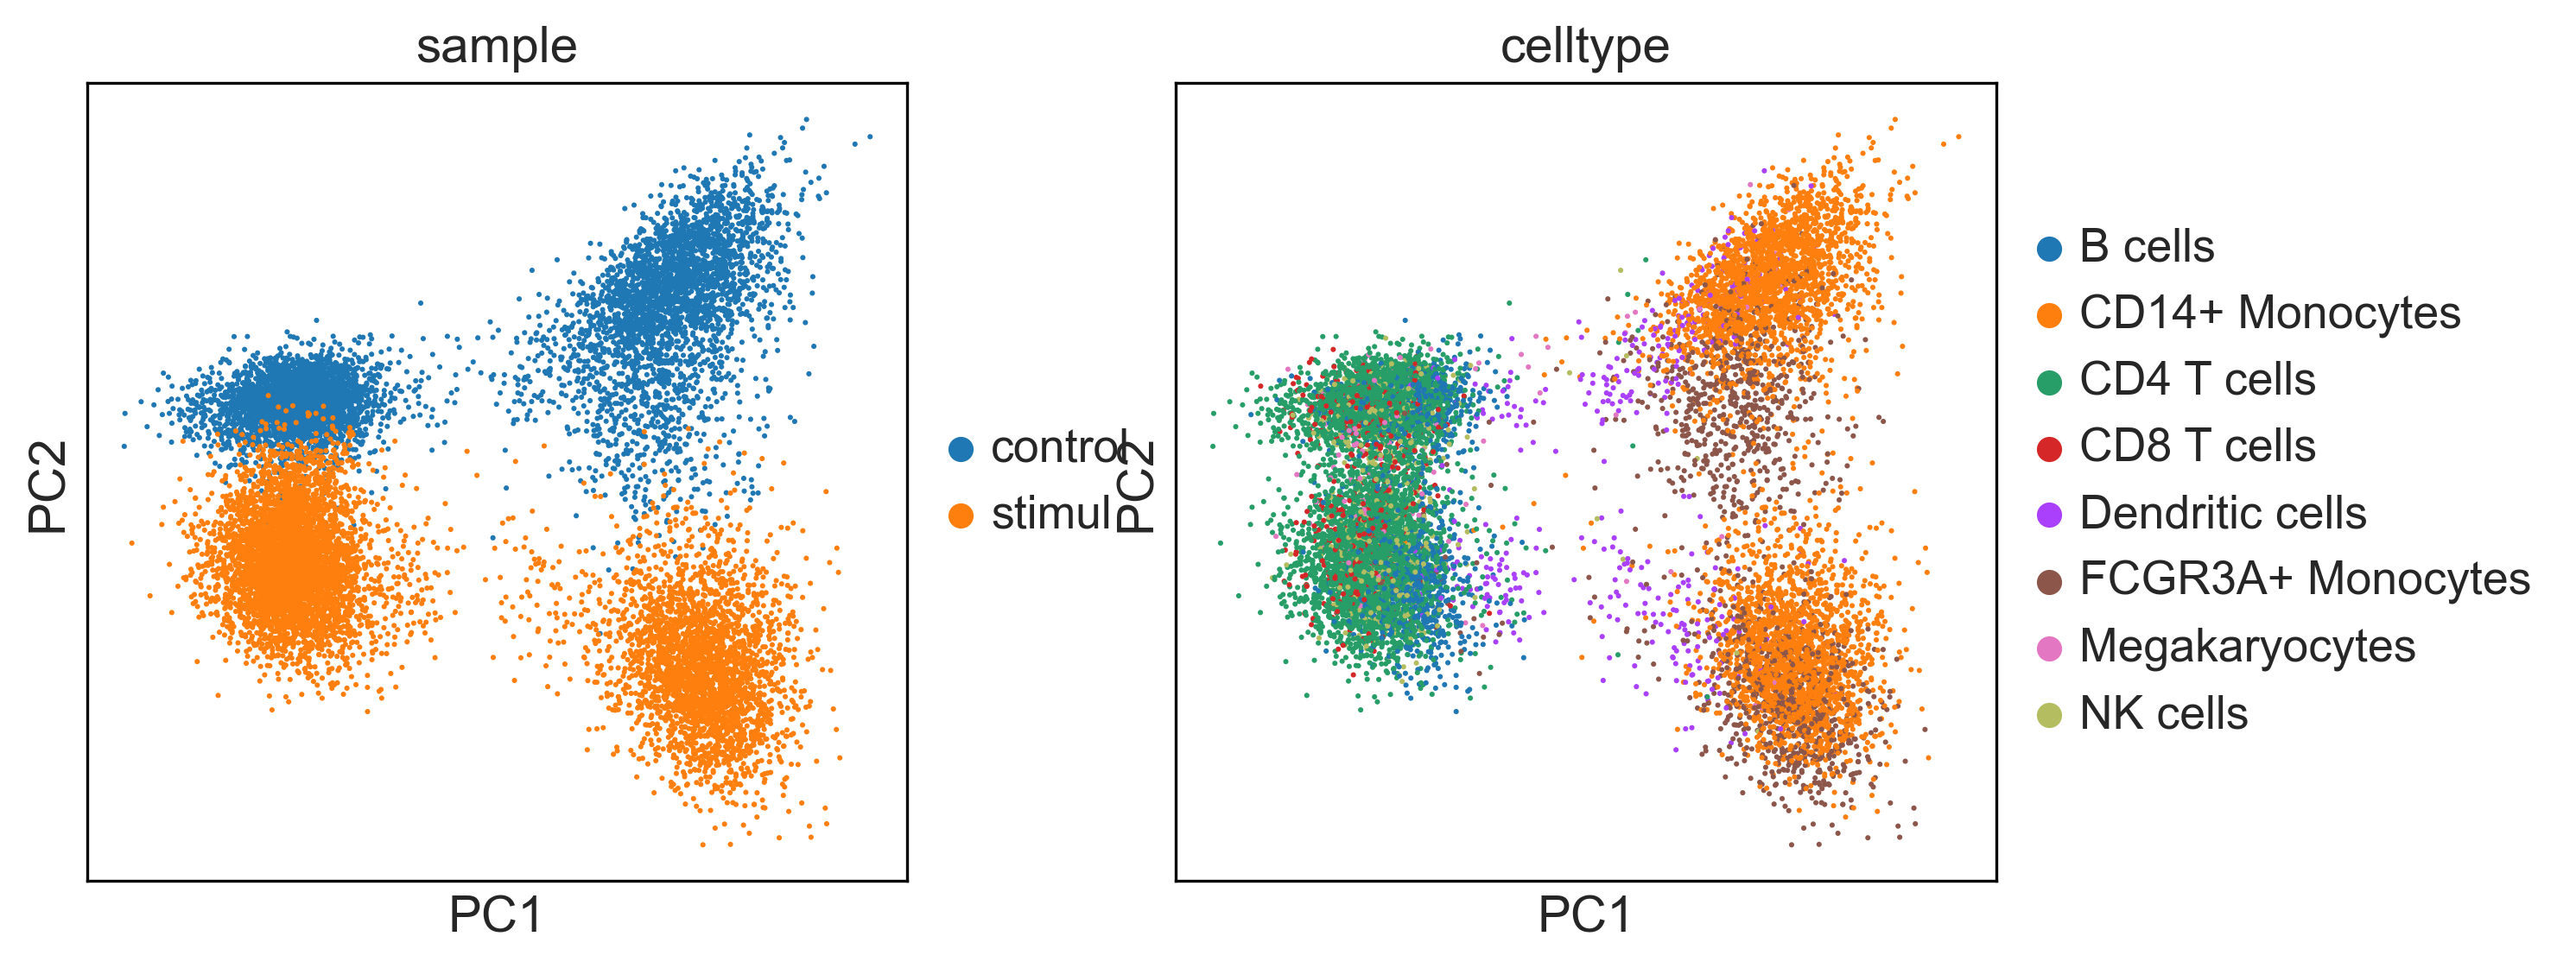

/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/plotting/_utils.py:288: UserWarning: Glyph 8942 (\N{VERTICAL ELLIPSIS}) missing from current font.
  pl.savefig(filename, dpi=dpi, bbox_inches='tight')
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/plotting/_utils.py:288: UserWarning: Glyph 8942 (\N{VERTICAL ELLIPSIS}) missing from current font.
  pl.savefig(filename, dpi=dpi, bbox_inches='tight')
/Users/ceglian/miniconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8942 (\N{VERTICAL ELLIPSIS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


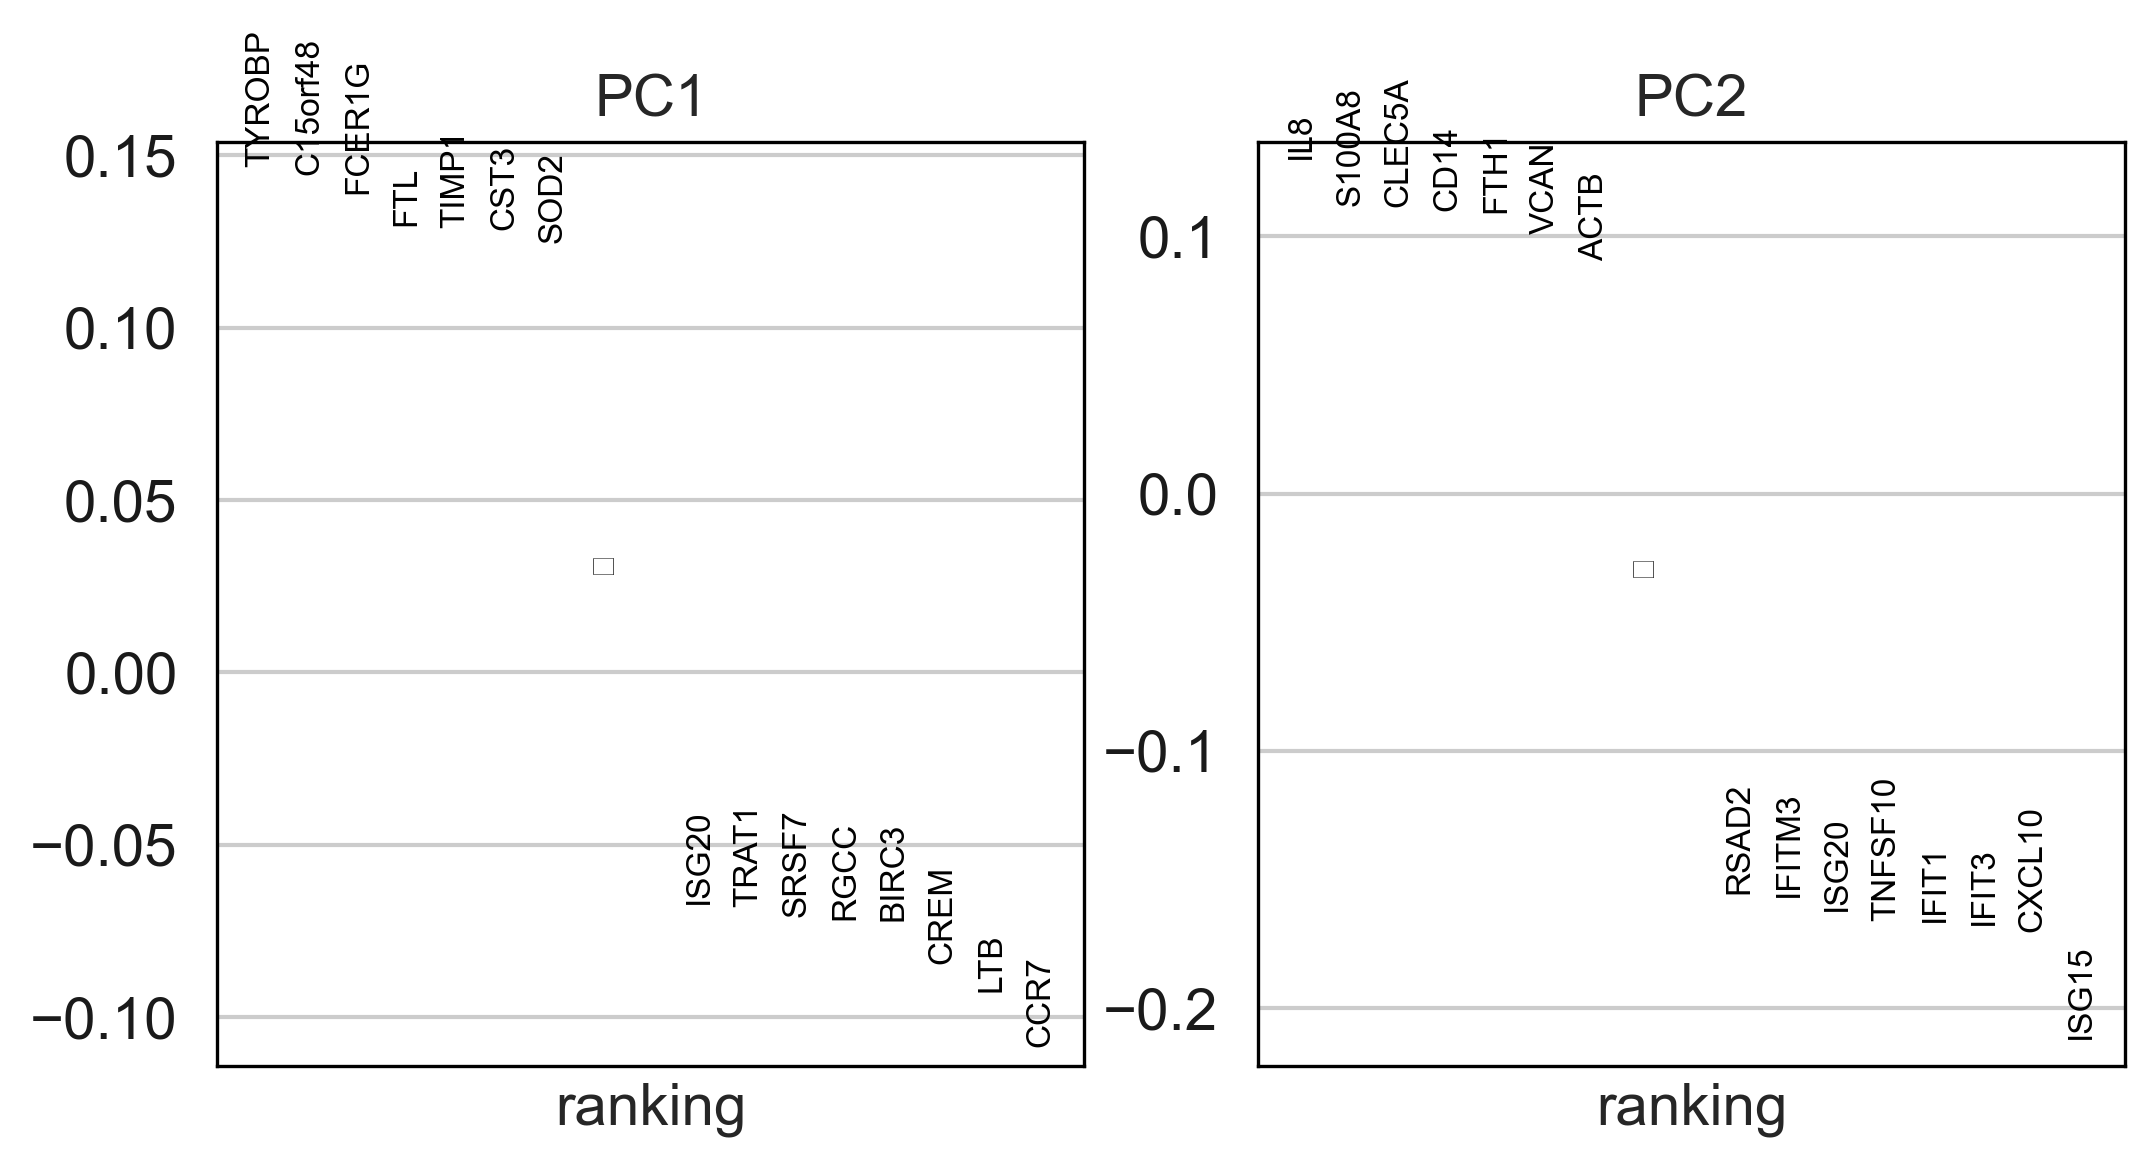

In [15]:
import scanpy as sc
sc.settings.verbosity = 3
sc.logging.print_header()
sc.settings.set_figure_params(dpi=150,facecolor='white')

adata = sc.read("PBMC.h5ad")
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
sc.pp.scale(adata,max_value=10)
sc.tl.pca(adata)
sc.pl.pca(adata, color=["sample","celltype"],save="pca.pdf",ncols=2)
sc.pl.pca_loadings(adata, components = '1,2',n_points=15,include_lowest=True, save="loadings.pdf")

# Run Correlation-based GeneVector (for comparison)

In [16]:
adata = sc.read("PBMC.h5ad")
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

normalizing counts per cell
    finished (0:00:00)


In [17]:
dataset = GeneVectorDataset(adata)

Loading Expression.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1051348/1051348 [00:01<00:00, 1002254.70it/s]


Reindexing Cooc


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14039/14039 [00:00<00:00, 65752.47it/s]


In [18]:
cmps = GeneVector(dataset,
                  output_file="pbmc_corr.vec",
                  emb_dimension=100,
                  batch_size=1000,
                  c=100000.,
                  correlation=True)

Generating matrix.
Decomposing


1000it [00:00, 1638.99it/s]


In [19]:
cmps.train(1000,threshold=1e-5)

Epoch 0 	Delta-> 4.080907416343689 	Loss: 4.095708815256755
Epoch 1 	Delta-> 2.5754044830799105 	Loss: 1.5118140935897828
Epoch 2 	Delta-> 0.8617260038852691 	Loss: 0.643462747335434
Epoch 3 	Delta-> 0.3313254743814468 	Loss: 0.3139559179544449
Epoch 4 	Delta-> 0.13536312952637672 	Loss: 0.17824816008408864
Epoch 5 	Delta-> 0.06986139006912707 	Loss: 0.10747914512952168
Epoch 6 	Delta-> 0.0376897543668747 	Loss: 0.06947862108548482
Epoch 7 	Delta-> 0.0212143737822771 	Loss: 0.04844958273073038
Epoch 8 	Delta-> 0.012673291470855476 	Loss: 0.0351482509324948
Epoch 9 	Delta-> 0.009032437112182379 	Loss: 0.026689142733812333
Epoch 10 	Delta-> 0.005993307661265136 	Loss: 0.020847566860417523
Epoch 11 	Delta-> 0.003840507566928865 	Loss: 0.01668901400019725
Epoch 12 	Delta-> 0.0032499033026397207 	Loss: 0.01340326452627778
Epoch 13 	Delta-> 0.0018774439115077264 	Loss: 0.011586475744843483
Epoch 14 	Delta-> 0.002302744379267096 	Loss: 0.009491018174837032
Epoch 15 	Delta-> 0.0006753043737262

In [20]:
import random
rembed = GeneEmbedding("pbmc_corr.vec", dataset, vector="average")
keys = list(embed.embeddings.keys())
rkeys = keys.copy()
random.shuffle(rkeys)
nembeddings=dict()
for k, nk in zip(keys,rkeys):
    nembeddings[nk] = rembed.embeddings[k]
rembed.embeddings=nembeddings

rsimilarities = dict()
for gene in tqdm.tqdm(rembed.genes):
    df = rembed.compute_similarities(gene)
    rsimilarities[gene] = dict(zip(df["Gene"],df["Similarity"]))

Loading average of 1st and 2nd weights.


FileNotFoundError: [Errno 2] No such file or directory: 'pbmc_corr.vec'

# Read Reactome Pathways

In [ ]:
import pandas
import tqdm
reactome = open("references/Reactome_2022.txt","r").readlines()
pathways = dict()
for pathway in reactome:
    pathway = pathway.split("\t")
    name = pathway[0]
    genes = pathway[2:]
    pathways[name]=genes
   

# Compare correlation GeneVector to mutual information GeneVector

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas
import tqdm

df = embed.compute_similarities("IFIT1").head(17)
is_isg = []
for g in df["Gene"]:
    if g in pathways["Interferon Signaling R-HSA-913531"]:
        is_isg.append("Interferon Signaling R-HSA-913531")
    else:
        is_isg.append("_Other")
df["is_isg"] = is_isg
fig,ax = plt.subplots(1,1,figsize=(5,5))
sns.barplot(data=df,y="Gene",x="Similarity",hue="is_isg",palette=["#FD971F","#272822"],ax=ax,dodge=False)
ax.set_title("Mutual Information - IFIT1 Similarity")
plt.tight_layout()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas
import tqdm

df = rembed.compute_similarities("IFIT1").head(17)
is_isg = []
for g in df["Gene"]:
    if g in pathways["Interferon Signaling R-HSA-913531"]:
        is_isg.append("Interferon Signaling R-HSA-913531")
    else:
        is_isg.append("_Other")
df["is_isg"] = is_isg
fig,ax = plt.subplots(1,1,figsize=(5,5))
sns.barplot(data=df,y="Gene",x="Similarity",hue="is_isg",palette=["#FD971F","#272822"],ax=ax,dodge=False)
ax.set_title("Correlation - IFIT1 Similarity")
plt.tight_layout()

# Compute Reactome Pathway and MSigDB Signature Overlap for Gene Pairs 

In [ ]:
import itertools
import collections
pathway_coverage = collections.defaultdict(lambda : collections.defaultdict(int))
for pair in tqdm.tqdm(list(itertools.combinations(embed.genes,2))):
    for pathway, genes in pathways.items():
        if pair[0] in genes and pair[1] in genes:
            pathway_coverage[pair[0]][pair[1]] += 1


In [ ]:
cts = open("references/c8.all.v2022.1.Hs.symbols.gmt.txt","r").readlines()
celltypes = dict()
for pathway in cts:
    pathway = pathway.split("\t")
    name = pathway[0]
    genes = pathway[2:]
    celltypes[name]=genes
import itertools
import collections
ct_coverage = collections.defaultdict(lambda : collections.defaultdict(int))
for pair in tqdm.tqdm(list(itertools.combinations(embed.genes,2))):
    for pathway, genes in celltypes.items():
        if pair[0] in genes and pair[1] in genes:
            ct_coverage[pair[0]][pair[1]] += 1

In [ ]:
pathway_counts = collections.defaultdict(set)
celltype_counts = collections.defaultdict(set)
for gene in embed.genes:
    for pathway, genes in pathways.items():
        if gene in genes:
            pathway_counts[gene].add(pathway)
    for pathway, genes in celltypes.items():
        if gene in genes:
            celltype_counts[gene].add(pathway)

# Randomly Shuffle Gene Vectors for Correlation and MI

In [ ]:
import random
similarities = dict()
for gene in tqdm.tqdm(embed.genes):
    df = embed.compute_similarities(gene)
    similarities[gene] = dict(zip(df["Gene"],df["Similarity"]))     

rsimilarities = dict()
rkeys = list(similarities.keys())
keys = rkeys.copy()
random.shuffle(rkeys)
for o, n in zip(keys,rkeys):
    lkeys = list(similarities[o].keys())
    rlkeys = lkeys.copy()
    random.shuffle(rlkeys)
    shuffsim = dict()
    for ol, nl in zip(lkeys,rlkeys):
        shuffsim[nl] = similarities[o][ol]
    rsimilarities[n] = shuffsim

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import numpy as np

class SeabornFig2Grid():

    def __init__(self, seaborngrid, fig,  subplot_spec):
        self.fig = fig
        self.sg = seaborngrid
        self.subplot = subplot_spec
        if isinstance(self.sg, sns.axisgrid.FacetGrid) or \
            isinstance(self.sg, sns.axisgrid.PairGrid):
            self._movegrid()
        elif isinstance(self.sg, sns.axisgrid.JointGrid):
            self._movejointgrid()
        self._finalize()

    def _movegrid(self):
        """ Move PairGrid or Facetgrid """
        self._resize()
        n = self.sg.axes.shape[0]
        m = self.sg.axes.shape[1]
        self.subgrid = gridspec.GridSpecFromSubplotSpec(n,m, subplot_spec=self.subplot)
        for i in range(n):
            for j in range(m):
                self._moveaxes(self.sg.axes[i,j], self.subgrid[i,j])

    def _movejointgrid(self):
        """ Move Jointgrid """
        h= self.sg.ax_joint.get_position().height
        h2= self.sg.ax_marg_x.get_position().height
        r = int(np.round(h/h2))
        self._resize()
        self.subgrid = gridspec.GridSpecFromSubplotSpec(r+1,r+1, subplot_spec=self.subplot)

        self._moveaxes(self.sg.ax_joint, self.subgrid[1:, :-1])
        self._moveaxes(self.sg.ax_marg_x, self.subgrid[0, :-1])
        self._moveaxes(self.sg.ax_marg_y, self.subgrid[1:, -1])

    def _moveaxes(self, ax, gs):
        ax.remove()
        ax.figure=self.fig
        self.fig.axes.append(ax)
        self.fig.add_axes(ax)
        ax._subplotspec = gs
        ax.set_position(gs.get_position(self.fig))
        ax.set_subplotspec(gs)

    def _finalize(self):
        plt.close(self.sg.fig)
        self.fig.canvas.mpl_connect("resize_event", self._resize)
        self.fig.canvas.draw()

    def _resize(self, evt=None):
        self.sg.fig.set_size_inches(self.fig.get_size_inches())

# Generate Figures for Correlation of Pathway/Signature and Cosine Similarity

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

pair_sim = []
pair_path = []
pair_type = []
genes = []
import numpy
for pair in tqdm.tqdm(list(itertools.combinations(embed.genes,2))):
    if len(pathway_counts[pair[0]]) > 0 and len(pathway_counts[pair[1]]) > 0 and len(celltype_counts[pair[0]]) > 0 and len(celltype_counts[pair[1]]) > 0:
        pcov = pathway_coverage[pair[0]][pair[1]] + ct_coverage[pair[0]][pair[1]]
        pair_path.append(pcov)
        pair_sim.append(similarities[pair[0]][pair[1]])
        genes.append("{}-{}".format(pair[0],pair[1]))
        
dfcomb = pandas.DataFrame.from_dict({"Similarity":pair_sim,"Coverage":pair_path, "Genes":genes})
dfcomb1 = dfcomb
mn = numpy.mean(dfcomb["Similarity"])
md = numpy.median(dfcomb["Similarity"])
import seaborn as sns
import matplotlib.pyplot as plt

g1 = sns.jointplot(data=dfcomb,x="Similarity",y="Coverage",color="#000000",kind="reg",scatter_kws={'s':1})


pair_sim = []
pair_path = []
pair_type = []
genes = []
for pair in tqdm.tqdm(list(itertools.combinations(embed.genes,2))):
    if len(pathway_counts[pair[0]]) > 0 and len(pathway_counts[pair[1]]) > 0 and len(celltype_counts[pair[0]]) > 0 and len(celltype_counts[pair[1]]) > 0:
        if rsimilarities[pair[0]][pair[1]] >= .9: 
            continue
        pcov = pathway_coverage[pair[0]][pair[1]] + ct_coverage[pair[0]][pair[1]]
        pair_path.append(pcov)
        pair_sim.append(rsimilarities[pair[0]][pair[1]])
        genes.append("{}-{}".format(pair[0],pair[1]))
        
    
        
dfcomb = pandas.DataFrame.from_dict({"Similarity":pair_sim,"Coverage":pair_path, "Genes":genes})
dfcomb2 = dfcomb
mn = numpy.mean(dfcomb["Similarity"])
md = numpy.median(dfcomb["Similarity"])


g0 = sns.jointplot(data=dfcomb,x="Similarity",y="Coverage",color="#000000",kind="reg",scatter_kws={'s':1})


import pickle
rsimmi = pickle.load(open("references/rsim_mi.pkl","rb"))
pair_sim = []
pair_path = []
pair_type = []
genes = []
for pair in tqdm.tqdm(list(itertools.combinations(embed.genes,2))):
    if len(pathway_counts[pair[0]]) > 0 and len(pathway_counts[pair[1]]) > 0 and len(celltype_counts[pair[0]]) > 0 and len(celltype_counts[pair[1]]) > 0:
        pcov = pathway_coverage[pair[0]][pair[1]] + ct_coverage[pair[0]][pair[1]]
        pair_path.append(pcov)
        pair_sim.append(rsimmi[pair[0]][pair[1]])
        genes.append("{}-{}".format(pair[0],pair[1]))
        
dfcomb = pandas.DataFrame.from_dict({"Similarity":pair_sim,"Coverage":pair_path, "Genes":genes})
dfcomb4 = dfcomb
mn = numpy.mean(dfcomb["Similarity"])
md = numpy.median(dfcomb["Similarity"])


g2 = sns.jointplot(data=dfcomb,x="Similarity",y="Coverage",color="#000000",kind="reg",scatter_kws={'s':1})



dfcomb = pandas.read_csv("references/dfcomb.csv")
dfcomb3 = dfcomb
mn = numpy.mean(dfcomb["Similarity"])
md = numpy.median(dfcomb["Similarity"])

g3 = sns.jointplot(data=dfcomb,x="Similarity",y="Coverage",color="#000000",kind="reg",scatter_kws={'s':1})


# Run LDVAE for Comparison

In [ ]:
import scanpy as sc
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import scvi

%matplotlib inline

In [ ]:
adata = sc.read("PBMC.h5ad")
adata

In [ ]:
scvi.model.LinearSCVI.setup_anndata(adata)
model = scvi.model.LinearSCVI(adata, n_latent=10)
model.train(max_epochs=250, plan_kwargs={'lr':5e-3}, check_val_every_n_epoch=10)
train_elbo = model.history['elbo_train'][1:]
test_elbo = model.history['elbo_validation']
ax = train_elbo.plot()
test_elbo.plot(ax = ax)
Z_hat = model.get_latent_representation()
for i, z in enumerate(Z_hat.T):
    adata.obs[f'Z_{i}'] = z
fig = plt.figure(figsize=(12, 8))

for f in range(0, 9, 2):
    plt.subplot(2, 3, int(f / 2) + 1)

    plt.scatter(adata.obs[f'Z_{f}'], adata.obs[f'Z_{f + 1}'], marker='.', s=4, label='Cells')

    plt.xlabel(f'Z_{f}')
    plt.ylabel(f'Z_{f + 1}')

plt.subplot(2, 3, 6)
plt.scatter(adata.obs[f'Z_{f}'], adata.obs[f'Z_{f + 1}'], marker='.', label='Cells', s=4)
plt.scatter(adata.obs[f'Z_{f}'], adata.obs[f'Z_{f + 1}'], c='w', label=None)
plt.gca().set_frame_on(False)
plt.gca().axis('off')

lgd = plt.legend(scatterpoints=3, loc='upper left')
for handle in lgd.legendHandles:
    handle.set_sizes([200])


plt.tight_layout()
loadings = model.get_loadings()
loadings.head()
print('Top loadings by magnitude\n---------------------------------------------------------------------------------------')
for clmn_ in loadings:
    loading_ = loadings[clmn_].sort_values()
    fstr = clmn_ + ':\t'
    fstr += '\t'.join([f'{i}, {loading_[i]:.2}' for i in loading_.head(5).index])
    fstr += '\n\t...\n\t'
    fstr += '\t'.join([f'{i}, {loading_[i]:.2}' for i in loading_.tail(5).index])
    print(fstr + '\n---------------------------------------------------------------------------------------\n')
    

z4 = list(reversed(loadings["Z_4"].sort_values().tail(20).index.tolist()))
fig,ax = plt.subplots(1,1,figsize=(14,6))
sc.pl.dotplot(adata,z4,groupby="detailed_celltype",standard_scale="var",save="ldvae.pdf",ax=ax)
